In [ ]:
# Klaudia Dikunow
# 20.12.2020
# Data source: https://www.kaggle.com/c/nlp-getting-started/data

## 1. Libraries import

In [725]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
from shapely.geometry import Point, Polygon, LineString, GeometryCollection
import math
import seaborn as sns
from matplotlib import font_manager as fm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
import nltk
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score

In [121]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


False

## 2. Reading the data

In [134]:
df = pd.read_csv('D:/kaggle/Real or Not NLP/nlp-getting-started/train.csv')

In [754]:
df_test = pd.read_csv('D:/kaggle/Real or Not NLP/nlp-getting-started/test.csv')

## 3. Feature engineering

#### Location to country

In [336]:
df['country'] = np.where(df['location'].isin(['USA', 'New York', 'United States', 'Los Angeles, CA', 'Washington, DC',
                                             'Chicago, IL', 'California', 'California, USA', 'San Francisco',
                                             'Florida', 'Los Angeles', 'Washington, D.C.', 'NYC',
                                             'Chicago', 'Seattle', 'Texas', 'US', 'Atlanta, GA', 'New York, NY',
                                             'San Francisco, CA', 'Sacramento, CA', 'Dallas, TX', 'San Diego, CA',
                                             'Nashville, TN', 'Denver, Colorado', 'Pennsylvania, USA','New York City',
                                              'Houston, TX', 'Memphis, TN', 'Tennessee', 'Seattle, WA', 'Austin, TX',
                                              'Denver, CO', 'California, United States', 'Colorado', 'Charlotte, NC',
                                              'Massachusetts', 'San Jose, CA', 'Portland, OR', 'Brooklyn, NY', 
                                             'Oklahoma City, OK', 'Paterson, New Jersey', 'Atlanta',
                                             'Orlando, FL', 'Paterson, New Jersey', 'Cleveland, OH', 'North Carolina',
                                             'Pennsylvania', 'NY', 'New Jersey', 'Paterson, New Jersey',
                                             'Boston, MA', 'Southern California', 'Asheville, NC', 'Texas, USA',
                                             'Wisconsin', 'New York, USA', 'Florida, USA', 'Tampa, FL', 'New Hampshire',
                                             'Indiana', 'Paterson, New Jersey ']), 'USA', 
                         np.where(df['location'].isin(['London', 'UK', 'United Kingdom', 'London, UK',
                                                      'Manchester', 'London, England', 'Leeds, England', 'Newcastle',
                                                      'Coventry', 'Manchester, England', 'london']), 'UK',
                         np.where(df['location'].isin(['Toronto', 'Canada', 'Calgary, Alberta', 'Vancouver, BC', 
                                                       'Calgary, AB', 'canada']), 'Canada',
                         np.where(df['location'].isin(['India', 'Mumbai', 'Mumbai, Maharashtra']), 'India',
                         np.where(df['location'].isin(['Sydney', 'Melbourne, Australia', 
                                                       'Sydney, New South Wales', 'Sydney, Australia']), 'Australia',
                         np.where(df['location'].isin(['Worldwide', 'Earth', 'World', 'worldwide', 'Global',
                                                      'Planet Earth', 'WorldWide']), 'Worldwide',
                         np.where(df['location'].isin(['Morioh, Japan', 'Tokyo']), 'Japan',
                         np.where(df['location'].isin(['Lagos', 'Lagos, Nigeria', 'Port Harcourt, Nigeria', 'Nigeria ']), 'Nigeria',
                         np.where(df['location'].isin(['??????', '304', 'ss', '??', ' Road to the Billionaires Club', 
                                                      'Pedophile hunting ground', 'in the Word of God']), np.nan,
                                
                         df['location'])))))))))

In [187]:
df_train.head()

,id,keyword,location,target,word_num,avg_word_len,has_hashtag,nonalpha_count,accident,amp,...,want,war,watch,way,weapon,work,world,wreck,year,youtube
5258,7519,oil%20spill,NaN,1,24,3.416667,0,5,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5672,8095,rescued,NaN,1,10,9.700000,0,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2424,3484,derailed,DC,1,22,3.909091,0,0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,3123,debris,Seattle,1,24,4.875000,1,7,0.0,0.508547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7485,10707,wreck,"Alabama, USA",0,34,2.911765,0,10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Text mining operations

In [135]:
nlp = spacy.load('en_core_web_sm')

#### Lemmatization

In [136]:
df['text'] = df["text"].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]) if (row != None) else '')

#### Word count

In [137]:
def word_count(string):
    words = string.split()
    return len(words)

In [138]:
df['word_num'] = df['text'].apply(word_count)

#### Avg word length

In [141]:
def avg_word_length(x):
    words = x.split()
    word_lengths = [len(word) for word in words]
    avg_word_length = sum(word_lengths)/len(words)
    return avg_word_length

In [142]:
df['avg_word_len'] = df['text'].apply(avg_word_length)

#### Hashtaghs

In [143]:
def has_hashtag(x):
    if '#' in x:
        return 1
    else:
        return 0

In [144]:
df['has_hashtag'] = df['text'].apply(has_hashtag)

#### Non-alphanumeric chars

In [145]:
def nonalpha_count(x):
    lemmas = [token.lemma_ for token in nlp(x)]
    lemmas2 = [lemma for lemma in lemmas if lemma.isalpha() or lemma == '-PRON-']
    return len(lemmas) - len(lemmas2)

In [146]:
df['nonalpha_count'] = df['text'].apply(nonalpha_count)

#### POS tag for keywords

In [244]:
def pos_tag(x):
    if pd.isna(x) == False:
        return nltk.pos_tag(x.split())[0][1]

In [245]:
df['keyword_pos'] = df['keyword'].apply(pos_tag)

#### Train test split

In [612]:
df_train, df_test=train_test_split(df,test_size=0.3,random_state=21, stratify = df['target'])

In [613]:
df_train = df_train.reset_index()

In [614]:
df_test = df_test.reset_index()

#### TF-IDF transformation

In [615]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english',  token_pattern = r'[A-Za-z]\w+', ngram_range=(1,3),
                                   min_df = 0.01)

In [616]:
tfidf = tfidf_vectorizer.fit_transform(df_train['text'])

In [617]:
df_tfidf = pd.DataFrame(tfidf.A, columns = tfidf_vectorizer.get_feature_names())

In [618]:
tfidf_test = tfidf_vectorizer.transform(df_test['text'])

In [619]:
df_tfidf_test = pd.DataFrame(tfidf_test.A, columns = tfidf_vectorizer.get_feature_names())

#### Checking for correlations between text variables

In [620]:
bazaCorr=df_tfidf.corr(method='pearson').dropna(how='all',axis=1).dropna(how='all',axis=0)
bazaCorr

,accident,amp,attack,bad,bag,big,body,bomb,building,burn,...,want,war,watch,way,weapon,work,world,wreck,year,youtube
accident,1.000000,-0.011666,-0.013424,-0.010476,-0.011087,-0.011130,-0.014825,-0.015017,-0.013759,-0.015090,...,-0.012468,0.003424,-0.012428,0.006191,-0.010291,-0.013545,-0.012639,0.002361,-0.000300,0.002566
amp,-0.011666,1.000000,-0.004906,-0.016302,-0.009193,-0.018985,-0.016737,-0.020150,-0.002249,0.001627,...,-0.010251,-0.011705,-0.008063,-0.005965,-0.002078,-0.011073,-0.020621,-0.016051,-0.020347,0.016613
attack,-0.013424,-0.004906,1.000000,-0.004476,-0.013357,-0.013409,-0.017861,-0.008776,-0.010693,-0.013371,...,-0.006955,-0.013771,-0.014972,-0.012966,0.010434,-0.016318,0.005017,-0.013445,-0.008264,-0.014716
bad,-0.010476,-0.016302,-0.004476,1.000000,-0.002159,-0.010465,0.000330,-0.009827,-0.012936,-0.006514,...,-0.006555,-0.004430,0.002926,-0.010118,-0.009675,-0.012735,-0.011883,0.009925,0.017308,-0.011484
bag,-0.011087,-0.009193,-0.013357,-0.002159,1.000000,0.004627,0.585769,-0.014942,-0.013690,-0.015014,...,-0.012405,-0.011373,-0.012365,-0.004265,-0.010239,-0.003185,-0.012575,-0.011104,-0.015097,-0.012153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
work,-0.013545,-0.011073,-0.016318,-0.012735,-0.003185,-0.013530,-0.000222,0.047584,-0.006544,0.006817,...,0.049596,0.072362,-0.001823,-0.003114,0.007114,1.000000,-0.000228,-0.006616,0.048090,-0.014848
world,-0.012639,-0.020621,0.005017,-0.011883,-0.012575,-0.003679,-0.016816,0.007703,-0.015607,-0.000276,...,0.011718,0.079745,-0.014096,-0.006539,0.006842,-0.000228,1.000000,-0.000929,-0.017210,-0.013855
wreck,0.002361,-0.016051,-0.013445,0.009925,-0.011104,-0.011147,-0.010082,-0.015040,-0.013780,-0.015113,...,0.004592,-0.011448,0.022795,-0.010779,-0.010306,-0.006616,-0.000929,1.000000,-0.015196,-0.003139
year,-0.000300,-0.020347,-0.008264,0.017308,-0.015097,-0.001673,-0.010728,0.086173,-0.012265,-0.010243,...,-0.013101,0.059196,-0.006115,-0.014655,-0.006501,0.048090,-0.017210,-0.015196,1.000000,-0.016632


In [621]:
correlated = []
correlated_results = []

for j in df_tfidf.columns:
    i = 0
    for x in bazaCorr[j]:
        if j!=bazaCorr[j].index[i] and (x >= 0.7 or x<=-0.7) and [j,bazaCorr[j].index[i]] not in correlated and [bazaCorr[j].index[i],j] not in correlated:         
            correlated.append([j,bazaCorr[j].index[i]])
            correlated_results.append([j,bazaCorr[j].index[i],x])
        i = i+1 

In [622]:
correlated_df = pd.DataFrame(correlated_results, columns=['X','Y','PEARSON_CORR'])
correlated_df.head()

,X,Y,PEARSON_CORR
0,know,pron know,0.715437


In [623]:
correlated_pairs = set(frozenset(p) for p in (correlated))

In [624]:
correlated_to_drop = []
for i in list(correlated_pairs):
    correlated_to_drop.append(list(i)[0])

In [625]:
df_tfidf.drop(correlated_to_drop, axis=1, inplace=True)

In [626]:
df_tfidf_test.drop(correlated_to_drop, axis=1, inplace=True)

In [627]:
df_train = df_train.join(df_tfidf)

In [628]:
df_test = df_test.join(df_tfidf_test)

In [629]:
df_train

,index,id,keyword,location,text,target,word_num,avg_word_len,has_hashtag,nonalpha_count,...,want,war,watch,way,weapon,work,world,wreck,year,youtube
0,5258,7519,oil%20spill,NaN,Hannah : ' Hiroshima sound like -PRON- could b...,1,24,3.416667,0,5,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,5672,8095,rescued,NaN,briton rescue amid Himalaya flood ( http://t.c...,1,10,9.700000,0,5,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,2424,3484,derailed,DC,so a train derail and instead of -PRON- get to...,1,22,3.909091,0,0,...,0.0,0.0,0.0,0.0,0.0,0.416767,0.0,0.000000,0.0,0.0
3,2179,3123,debris,Seattle,# love # food # fun malaysian Prime Minister N...,1,24,4.875000,1,7,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,7485,10707,wreck,"Alabama, USA",first wreck today . so so glad -PRON- and mom ...,0,34,2.911765,0,10,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.395422,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,6522,9329,survive,EveryWhere,: : survive ? ?,0,5,2.200000,0,4,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
5325,5957,8508,screaming,"Moore, OK",@noahshack -PRON- be hot & amp ; -PRON- can si...,0,19,3.105263,0,10,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
5326,448,651,attack,NaN,http://t.co/ptkrxtzjtv Nashville Theater Att...,1,12,7.500000,0,5,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
5327,2213,3170,deluge,"Brackley Beach, PE, Canada",-PRON- be a deluge in Trois - Rivieres . about...,0,18,5.222222,1,4,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [630]:
to_drop = ['index', 'keyword', 'text']

In [631]:
df_train.drop(to_drop, axis=1, inplace=True)
df_test.drop(to_drop, axis=1, inplace=True)

In [632]:
df_train.shape

(5329, 95)

In [633]:
df_test.shape

(2284, 95)

In [634]:
df_train.head()

,id,location,target,word_num,avg_word_len,has_hashtag,nonalpha_count,keyword_pos,country,accident,...,want,war,watch,way,weapon,work,world,wreck,year,youtube
0,7519,NaN,1,24,3.416667,0,5,NN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,8095,NaN,1,10,9.700000,0,5,VBN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,3484,DC,1,22,3.909091,0,0,VBN,DC,0.0,...,0.0,0.0,0.0,0.0,0.0,0.416767,0.0,0.000000,0.0,0.0
3,3123,Seattle,1,24,4.875000,1,7,NN,USA,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,10707,"Alabama, USA",0,34,2.911765,0,10,NN,"Alabama, USA",0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.395422,0.0,0.0


## 5. Missing values

#### Character

In [635]:
chars = list(df_train.select_dtypes(include=['O']).columns)

In [636]:
chars

['location', 'keyword_pos', 'country']

In [637]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [638]:
braki_char = pd.DataFrame(missing_values_table(df_train[chars]))
braki_lista_char = braki_char.loc[braki_char['% of Total Values'] > 0.0 ]

print(braki_lista_char)

Your selected dataframe has 3 columns.
There are 3 columns that have missing values.
             Missing Values  % of Total Values
country                1794               33.7
location               1763               33.1
keyword_pos              37                0.7


In [639]:
df_train['country'] = df_train['country'].fillna('Missing')
df_test['country'] = df_test['country'].fillna('Missing')

df_train['location'] = df_train['location'].fillna('Missing')
df_test['location'] = df_test['location'].fillna('Missing')

df_train['keyword_pos'] = df_train['keyword_pos'].fillna('NN')
df_test['keyword_pos'] = df_test['keyword_pos'].fillna('NN')

#### Numeric

In [640]:
nums = [i for i in df_train.columns if i not in chars and i not in ('id', 'target')]

In [641]:
braki_num = pd.DataFrame(missing_values_table(df_train[nums]))
braki_lista_num = braki_num.loc[braki_num['% of Total Values'] > 0.0 ]

print(braki_lista_num)

Your selected dataframe has 90 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


## 6. Binning character variables

In [642]:
to_dummify = braki_lista_char.index

In [643]:
to_dummify

Index(['country', 'location', 'keyword_pos'], dtype='object')

In [644]:
for i in to_dummify:
    dummy = pd.get_dummies(df_train[i], prefix = i)
    dummy_test = pd.get_dummies(df_test[i], prefix = i)
    if df_train[i].value_counts(sort=True).index[0] not in ('Missing'):
        mask = pd.DataFrame(df_train[i].value_counts(sort=True)).index[0]
    else:
        mask = pd.DataFrame(df_train[i].value_counts(sort=True)).index[1] 
    dummy.drop(i+'_'+mask, inplace=True, axis=1)
    dummy_test.drop(i+'_'+mask, inplace=True, axis=1)
    df_train = pd.concat([df_train,dummy], axis=1)
    df_test = pd.concat([df_test,dummy_test], axis=1)
    df_train.drop(i, inplace=True, axis=1)
    df_test.drop(i, inplace=True, axis=1)

## 7. Variable checks

#### Degenerated variables

In [646]:
bin_col = list()
for i in df_train.columns:
    if (len(df_train[i].value_counts())==2) & (i !='target'):
        bin_col.append(i)

In [647]:
zdegenerowane = []
for col in bin_col:
    x = df_train[col].value_counts() / df_train[col].value_counts().sum()
    print(" ")
    print(col)
    print(x)    
    if x.iloc[0] <= 0.005 or x.iloc[1] <= 0.005:
        print(col)
        print(x)
        zdegenerowane.append(col)

 
has_hashtag
0    0.770876
1    0.229124
Name: has_hashtag, dtype: float64
 
country_  Glasgow 
0    0.999812
1    0.000188
Name: country_  Glasgow , dtype: float64
country_  Glasgow 
0    0.999812
1    0.000188
Name: country_  Glasgow , dtype: float64
 
country_  Melbourne, Australia
0    0.999812
1    0.000188
Name: country_  Melbourne, Australia, dtype: float64
country_  Melbourne, Australia
0    0.999812
1    0.000188
Name: country_  Melbourne, Australia, dtype: float64
 
country_  News
0    0.999812
1    0.000188
Name: country_  News, dtype: float64
country_  News
0    0.999812
1    0.000188
Name: country_  News, dtype: float64
 
country_  å_ 
0    0.999812
1    0.000188
Name: country_  å_ , dtype: float64
country_  å_ 
0    0.999812
1    0.000188
Name: country_  å_ , dtype: float64
 
country_ 45å¡ 5'12.53N   14å¡ 7'24.93E
0    0.999812
1    0.000188
Name: country_ 45å¡ 5'12.53N   14å¡ 7'24.93E, dtype: float64
country_ 45å¡ 5'12.53N   14å¡ 7'24.93E
0    0.999812
1    0.000188
Nam

 
country_1D | 5SOS | AG
0    0.999812
1    0.000188
Name: country_1D | 5SOS | AG, dtype: float64
country_1D | 5SOS | AG
0    0.999812
1    0.000188
Name: country_1D | 5SOS | AG, dtype: float64
 
country_2 high 2 come down 
0    0.999812
1    0.000188
Name: country_2 high 2 come down , dtype: float64
country_2 high 2 come down 
0    0.999812
1    0.000188
Name: country_2 high 2 come down , dtype: float64
 
country_2,360 miles away
0    0.999812
1    0.000188
Name: country_2,360 miles away, dtype: float64
country_2,360 miles away
0    0.999812
1    0.000188
Name: country_2,360 miles away, dtype: float64
 
country_21.462446,-158.022017
0    0.999437
1    0.000563
Name: country_21.462446,-158.022017, dtype: float64
country_21.462446,-158.022017
0    0.999437
1    0.000563
Name: country_21.462446,-158.022017, dtype: float64
 
country_23 countries and counting!
0    0.999812
1    0.000188
Name: country_23 countries and counting!, dtype: float64
country_23 countries and counting!
0    0.9998

 
country_????s ?? ????Ìø????Ì¡a
0    0.999812
1    0.000188
Name: country_????s ?? ????Ìø????Ì¡a, dtype: float64
country_????s ?? ????Ìø????Ì¡a
0    0.999812
1    0.000188
Name: country_????s ?? ????Ìø????Ì¡a, dtype: float64
 
country_?Gangsta OC / MV RP; 18+.?
0    0.999812
1    0.000188
Name: country_?Gangsta OC / MV RP; 18+.?, dtype: float64
country_?Gangsta OC / MV RP; 18+.?
0    0.999812
1    0.000188
Name: country_?Gangsta OC / MV RP; 18+.?, dtype: float64
 
country_?^åá??åá?^?? ??
0    0.999812
1    0.000188
Name: country_?^åá??åá?^?? ??, dtype: float64
country_?^åá??åá?^?? ??
0    0.999812
1    0.000188
Name: country_?^åá??åá?^?? ??, dtype: float64
 
country_@ ForSL/RP
0    0.999812
1    0.000188
Name: country_@ ForSL/RP, dtype: float64
country_@ ForSL/RP
0    0.999812
1    0.000188
Name: country_@ ForSL/RP, dtype: float64
 
country_@UntmdOutdoors #T.O.R.K 
0    0.999812
1    0.000188
Name: country_@UntmdOutdoors #T.O.R.K , dtype: float64
country_@UntmdOutdoors #T.O.R.K 
0    

 
country_Alexandria, VA
0    0.999625
1    0.000375
Name: country_Alexandria, VA, dtype: float64
country_Alexandria, VA
0    0.999625
1    0.000375
Name: country_Alexandria, VA, dtype: float64
 
country_Alexandria, VA, USA
0    0.999812
1    0.000188
Name: country_Alexandria, VA, USA, dtype: float64
country_Alexandria, VA, USA
0    0.999812
1    0.000188
Name: country_Alexandria, VA, USA, dtype: float64
 
country_Alger-New York-San Francisco
0    0.999812
1    0.000188
Name: country_Alger-New York-San Francisco, dtype: float64
country_Alger-New York-San Francisco
0    0.999812
1    0.000188
Name: country_Alger-New York-San Francisco, dtype: float64
 
country_Alicante, Spain
0    0.999812
1    0.000188
Name: country_Alicante, Spain, dtype: float64
country_Alicante, Spain
0    0.999812
1    0.000188
Name: country_Alicante, Spain, dtype: float64
 
country_Alicante, Valencia
0    0.999812
1    0.000188
Name: country_Alicante, Valencia, dtype: float64
country_Alicante, Valencia
0    0.9998

 
country_Austin, Texas
0    0.999437
1    0.000563
Name: country_Austin, Texas, dtype: float64
country_Austin, Texas
0    0.999437
1    0.000563
Name: country_Austin, Texas, dtype: float64
 
country_Australia
0    0.994933
1    0.005067
Name: country_Australia, dtype: float64
 
country_Australia 
0    0.999812
1    0.000188
Name: country_Australia , dtype: float64
country_Australia 
0    0.999812
1    0.000188
Name: country_Australia , dtype: float64
 
country_Aveiro, Portugal
0    0.999812
1    0.000188
Name: country_Aveiro, Portugal, dtype: float64
country_Aveiro, Portugal
0    0.999812
1    0.000188
Name: country_Aveiro, Portugal, dtype: float64
 
country_Avon
0    0.999812
1    0.000188
Name: country_Avon, dtype: float64
country_Avon
0    0.999812
1    0.000188
Name: country_Avon, dtype: float64
 
country_Avon, OH
0    0.999812
1    0.000188
Name: country_Avon, OH, dtype: float64
country_Avon, OH
0    0.999812
1    0.000188
Name: country_Avon, OH, dtype: float64
 
country_BKI-KUA


 
country_Birmingham, United Kingdom
0    0.999812
1    0.000188
Name: country_Birmingham, United Kingdom, dtype: float64
country_Birmingham, United Kingdom
0    0.999812
1    0.000188
Name: country_Birmingham, United Kingdom, dtype: float64
 
country_Bishops Lydeard, England
0    0.999812
1    0.000188
Name: country_Bishops Lydeard, England, dtype: float64
country_Bishops Lydeard, England
0    0.999812
1    0.000188
Name: country_Bishops Lydeard, England, dtype: float64
 
country_BiÌ±an,Laguna
0    0.999812
1    0.000188
Name: country_BiÌ±an,Laguna, dtype: float64
country_BiÌ±an,Laguna
0    0.999812
1    0.000188
Name: country_BiÌ±an,Laguna, dtype: float64
 
country_Black Canyon New River, AZ
0    0.999812
1    0.000188
Name: country_Black Canyon New River, AZ, dtype: float64
country_Black Canyon New River, AZ
0    0.999812
1    0.000188
Name: country_Black Canyon New River, AZ, dtype: float64
 
country_Blackpool
0    0.999625
1    0.000375
Name: country_Blackpool, dtype: float64
coun

Name: country_Buffalo NY, dtype: float64
 
country_Buffalo, NY
0    0.999812
1    0.000188
Name: country_Buffalo, NY, dtype: float64
country_Buffalo, NY
0    0.999812
1    0.000188
Name: country_Buffalo, NY, dtype: float64
 
country_Bukittinggi  ?? Sumatera Barat
0    0.999812
1    0.000188
Name: country_Bukittinggi  ?? Sumatera Barat, dtype: float64
country_Bukittinggi  ?? Sumatera Barat
0    0.999812
1    0.000188
Name: country_Bukittinggi  ?? Sumatera Barat, dtype: float64
 
country_Bulgaria
0    0.999812
1    0.000188
Name: country_Bulgaria, dtype: float64
country_Bulgaria
0    0.999812
1    0.000188
Name: country_Bulgaria, dtype: float64
 
country_Burlington, VT
0    0.999812
1    0.000188
Name: country_Burlington, VT, dtype: float64
country_Burlington, VT
0    0.999812
1    0.000188
Name: country_Burlington, VT, dtype: float64
 
country_Buscame EL tu Melte
0    0.999812
1    0.000188
Name: country_Buscame EL tu Melte, dtype: float64
country_Buscame EL tu Melte
0    0.999812
1    

 
country_Charlotte, North Carolina
0    0.999812
1    0.000188
Name: country_Charlotte, North Carolina, dtype: float64
country_Charlotte, North Carolina
0    0.999812
1    0.000188
Name: country_Charlotte, North Carolina, dtype: float64
 
country_Charlottetown
0    0.999812
1    0.000188
Name: country_Charlottetown, dtype: float64
country_Charlottetown
0    0.999812
1    0.000188
Name: country_Charlottetown, dtype: float64
 
country_Charter Member of the VRWC
0    0.999812
1    0.000188
Name: country_Charter Member of the VRWC, dtype: float64
country_Charter Member of the VRWC
0    0.999812
1    0.000188
Name: country_Charter Member of the VRWC, dtype: float64
 
country_Chasing My Dreams w/Jass??
0    0.999812
1    0.000188
Name: country_Chasing My Dreams w/Jass??, dtype: float64
country_Chasing My Dreams w/Jass??
0    0.999812
1    0.000188
Name: country_Chasing My Dreams w/Jass??, dtype: float64
 
country_Chatham, IL
0    0.999812
1    0.000188
Name: country_Chatham, IL, dtype: floa

 
country_Cydia
0    0.999812
1    0.000188
Name: country_Cydia, dtype: float64
country_Cydia
0    0.999812
1    0.000188
Name: country_Cydia, dtype: float64
 
country_Cymru araul
0    0.999812
1    0.000188
Name: country_Cymru araul, dtype: float64
country_Cymru araul
0    0.999812
1    0.000188
Name: country_Cymru araul, dtype: float64
 
country_Cyprus
0    0.999812
1    0.000188
Name: country_Cyprus, dtype: float64
country_Cyprus
0    0.999812
1    0.000188
Name: country_Cyprus, dtype: float64
 
country_D(M)V  
0    0.999812
1    0.000188
Name: country_D(M)V  , dtype: float64
country_D(M)V  
0    0.999812
1    0.000188
Name: country_D(M)V  , dtype: float64
 
country_D.C. - Baltimore - Annapolis
0    0.999812
1    0.000188
Name: country_D.C. - Baltimore - Annapolis, dtype: float64
country_D.C. - Baltimore - Annapolis
0    0.999812
1    0.000188
Name: country_D.C. - Baltimore - Annapolis, dtype: float64
 
country_DC
0    0.999812
1    0.000188
Name: country_DC, dtype: float64
country_

Name: country_Durham N.C , dtype: float64
 
country_Durham, NC
0    0.999625
1    0.000375
Name: country_Durham, NC, dtype: float64
country_Durham, NC
0    0.999625
1    0.000375
Name: country_Durham, NC, dtype: float64
 
country_Dutch/English/German
0    0.999812
1    0.000188
Name: country_Dutch/English/German, dtype: float64
country_Dutch/English/German
0    0.999812
1    0.000188
Name: country_Dutch/English/German, dtype: float64
 
country_DÌ_sseldorf, Germany
0    0.999812
1    0.000188
Name: country_DÌ_sseldorf, Germany, dtype: float64
country_DÌ_sseldorf, Germany
0    0.999812
1    0.000188
Name: country_DÌ_sseldorf, Germany, dtype: float64
 
country_EGYPT
0    0.999812
1    0.000188
Name: country_EGYPT, dtype: float64
country_EGYPT
0    0.999812
1    0.000188
Name: country_EGYPT, dtype: float64
 
country_EIC
0    0.999812
1    0.000188
Name: country_EIC, dtype: float64
country_EIC
0    0.999812
1    0.000188
Name: country_EIC, dtype: float64
 
country_EIU  Chucktown/LaSalle IL


 
country_Europe
0    0.999812
1    0.000188
Name: country_Europe, dtype: float64
country_Europe
0    0.999812
1    0.000188
Name: country_Europe, dtype: float64
 
country_Evanston, IL
0    0.999625
1    0.000375
Name: country_Evanston, IL, dtype: float64
country_Evanston, IL
0    0.999625
1    0.000375
Name: country_Evanston, IL, dtype: float64
 
country_Evansville, IN
0    0.999812
1    0.000188
Name: country_Evansville, IN, dtype: float64
country_Evansville, IN
0    0.999812
1    0.000188
Name: country_Evansville, IN, dtype: float64
 
country_Evergreen Colorado
0    0.999812
1    0.000188
Name: country_Evergreen Colorado, dtype: float64
country_Evergreen Colorado
0    0.999812
1    0.000188
Name: country_Evergreen Colorado, dtype: float64
 
country_Every Where in the World
0    0.999812
1    0.000188
Name: country_Every Where in the World, dtype: float64
country_Every Where in the World
0    0.999812
1    0.000188
Name: country_Every Where in the World, dtype: float64
 
country_Ever

0    0.999812
1    0.000188
Name: country_Friendswood, TX, dtype: float64
 
country_Frisco, TX
0    0.999812
1    0.000188
Name: country_Frisco, TX, dtype: float64
country_Frisco, TX
0    0.999812
1    0.000188
Name: country_Frisco, TX, dtype: float64
 
country_From a torn up town MANCHESTER
0    0.999812
1    0.000188
Name: country_From a torn up town MANCHESTER, dtype: float64
country_From a torn up town MANCHESTER
0    0.999812
1    0.000188
Name: country_From a torn up town MANCHESTER, dtype: float64
 
country_Frome, Somerset, England
0    0.999812
1    0.000188
Name: country_Frome, Somerset, England, dtype: float64
country_Frome, Somerset, England
0    0.999812
1    0.000188
Name: country_Frome, Somerset, England, dtype: float64
 
country_Frostburg
0    0.999812
1    0.000188
Name: country_Frostburg, dtype: float64
country_Frostburg
0    0.999812
1    0.000188
Name: country_Frostburg, dtype: float64
 
country_Fruit Bowl
0    0.999812
1    0.000188
Name: country_Fruit Bowl, dtype: 

 
country_Halifax, Nova Scotia
0    0.999812
1    0.000188
Name: country_Halifax, Nova Scotia, dtype: float64
country_Halifax, Nova Scotia
0    0.999812
1    0.000188
Name: country_Halifax, Nova Scotia, dtype: float64
 
country_Halton Region
0    0.999812
1    0.000188
Name: country_Halton Region, dtype: float64
country_Halton Region
0    0.999812
1    0.000188
Name: country_Halton Region, dtype: float64
 
country_Halton, Ontario
0    0.999812
1    0.000188
Name: country_Halton, Ontario, dtype: float64
country_Halton, Ontario
0    0.999812
1    0.000188
Name: country_Halton, Ontario, dtype: float64
 
country_Hamburg, DE
0    0.999812
1    0.000188
Name: country_Hamburg, DE, dtype: float64
country_Hamburg, DE
0    0.999812
1    0.000188
Name: country_Hamburg, DE, dtype: float64
 
country_Hamilton, ON
0    0.999812
1    0.000188
Name: country_Hamilton, ON, dtype: float64
country_Hamilton, ON
0    0.999812
1    0.000188
Name: country_Hamilton, ON, dtype: float64
 
country_Hamilton, Ontari

 
country_Houston TX
0    0.999625
1    0.000375
Name: country_Houston TX, dtype: float64
country_Houston TX
0    0.999625
1    0.000375
Name: country_Houston TX, dtype: float64
 
country_Houston, TX  
0    0.999812
1    0.000188
Name: country_Houston, TX  , dtype: float64
country_Houston, TX  
0    0.999812
1    0.000188
Name: country_Houston, TX  , dtype: float64
 
country_Houston, Texas
0    0.999812
1    0.000188
Name: country_Houston, Texas, dtype: float64
country_Houston, Texas
0    0.999812
1    0.000188
Name: country_Houston, Texas, dtype: float64
 
country_Houston, Texas ! 
0    0.999812
1    0.000188
Name: country_Houston, Texas ! , dtype: float64
country_Houston, Texas ! 
0    0.999812
1    0.000188
Name: country_Houston, Texas ! , dtype: float64
 
country_Hoxton, London
0    0.999812
1    0.000188
Name: country_Hoxton, London, dtype: float64
country_Hoxton, London
0    0.999812
1    0.000188
Name: country_Hoxton, London, dtype: float64
 
country_Htx
0    0.999812
1    0.000

 
country_Inglewood, CA
0    0.999812
1    0.000188
Name: country_Inglewood, CA, dtype: float64
country_Inglewood, CA
0    0.999812
1    0.000188
Name: country_Inglewood, CA, dtype: float64
 
country_Innerhalb der LÌ_cke
0    0.999812
1    0.000188
Name: country_Innerhalb der LÌ_cke, dtype: float64
country_Innerhalb der LÌ_cke
0    0.999812
1    0.000188
Name: country_Innerhalb der LÌ_cke, dtype: float64
 
country_Instagram - @heyimginog 
0    0.999625
1    0.000375
Name: country_Instagram - @heyimginog , dtype: float64
country_Instagram - @heyimginog 
0    0.999625
1    0.000375
Name: country_Instagram - @heyimginog , dtype: float64
 
country_Instagram: trillrebel_
0    0.999812
1    0.000188
Name: country_Instagram: trillrebel_, dtype: float64
country_Instagram: trillrebel_
0    0.999812
1    0.000188
Name: country_Instagram: trillrebel_, dtype: float64
 
country_Insula Barataria
0    0.999812
1    0.000188
Name: country_Insula Barataria, dtype: float64
country_Insula Barataria
0    

 
country_Kansas
0    0.999812
1    0.000188
Name: country_Kansas, dtype: float64
country_Kansas
0    0.999812
1    0.000188
Name: country_Kansas, dtype: float64
 
country_Kansas City
0    0.999437
1    0.000563
Name: country_Kansas City, dtype: float64
country_Kansas City
0    0.999437
1    0.000563
Name: country_Kansas City, dtype: float64
 
country_Kansas City, MO
0    0.999625
1    0.000375
Name: country_Kansas City, MO, dtype: float64
country_Kansas City, MO
0    0.999625
1    0.000375
Name: country_Kansas City, MO, dtype: float64
 
country_Karachi
0    0.999437
1    0.000563
Name: country_Karachi, dtype: float64
country_Karachi
0    0.999437
1    0.000563
Name: country_Karachi, dtype: float64
 
country_Karachi 
0    0.999812
1    0.000188
Name: country_Karachi , dtype: float64
country_Karachi 
0    0.999812
1    0.000188
Name: country_Karachi , dtype: float64
 
country_Karachi Pakistan
0    0.999625
1    0.000375
Name: country_Karachi Pakistan, dtype: float64
country_Karachi Paki

 
country_Laredo, TX
0    0.999812
1    0.000188
Name: country_Laredo, TX, dtype: float64
country_Laredo, TX
0    0.999812
1    0.000188
Name: country_Laredo, TX, dtype: float64
 
country_Las Cruces, NM
0    0.999812
1    0.000188
Name: country_Las Cruces, NM, dtype: float64
country_Las Cruces, NM
0    0.999812
1    0.000188
Name: country_Las Cruces, NM, dtype: float64
 
country_Las Vegas
0    0.999437
1    0.000563
Name: country_Las Vegas, dtype: float64
country_Las Vegas
0    0.999437
1    0.000563
Name: country_Las Vegas, dtype: float64
 
country_Las Vegas aka Hell
0    0.999812
1    0.000188
Name: country_Las Vegas aka Hell, dtype: float64
country_Las Vegas aka Hell
0    0.999812
1    0.000188
Name: country_Las Vegas aka Hell, dtype: float64
 
country_Las Vegas, NV
0    0.999812
1    0.000188
Name: country_Las Vegas, NV, dtype: float64
country_Las Vegas, NV
0    0.999812
1    0.000188
Name: country_Las Vegas, NV, dtype: float64
 
country_Las Vegas, NV 
0    0.999812
1    0.000188
N

 
country_London/Surrey 
0    0.999812
1    0.000188
Name: country_London/Surrey , dtype: float64
country_London/Surrey 
0    0.999812
1    0.000188
Name: country_London/Surrey , dtype: float64
 
country_Londonstan
0    0.999812
1    0.000188
Name: country_Londonstan, dtype: float64
country_Londonstan
0    0.999812
1    0.000188
Name: country_Londonstan, dtype: float64
 
country_Long Beach, CA
0    0.999812
1    0.000188
Name: country_Long Beach, CA, dtype: float64
country_Long Beach, CA
0    0.999812
1    0.000188
Name: country_Long Beach, CA, dtype: float64
 
country_Long Island
0    0.999812
1    0.000188
Name: country_Long Island, dtype: float64
country_Long Island
0    0.999812
1    0.000188
Name: country_Long Island, dtype: float64
 
country_Long Island, NY
0    0.999812
1    0.000188
Name: country_Long Island, NY, dtype: float64
country_Long Island, NY
0    0.999812
1    0.000188
Name: country_Long Island, NY, dtype: float64
 
country_Los Angeles 
0    0.999812
1    0.000188
Nam

0    0.999812
1    0.000188
Name: country_Maldives, dtype: float64
country_Maldives
0    0.999812
1    0.000188
Name: country_Maldives, dtype: float64
 
country_Manavadar, Gujarat
0    0.999812
1    0.000188
Name: country_Manavadar, Gujarat, dtype: float64
country_Manavadar, Gujarat
0    0.999812
1    0.000188
Name: country_Manavadar, Gujarat, dtype: float64
 
country_Manchester UK
0    0.999812
1    0.000188
Name: country_Manchester UK, dtype: float64
country_Manchester UK
0    0.999812
1    0.000188
Name: country_Manchester UK, dtype: float64
 
country_Manchester, NH
0    0.999625
1    0.000375
Name: country_Manchester, NH, dtype: float64
country_Manchester, NH
0    0.999625
1    0.000375
Name: country_Manchester, NH, dtype: float64
 
country_Manchester, The World, England
0    0.999812
1    0.000188
Name: country_Manchester, The World, England, dtype: float64
country_Manchester, The World, England
0    0.999812
1    0.000188
Name: country_Manchester, The World, England, dtype: float

Name: country_Missing, dtype: float64
 
country_Missouri, USA
0    0.999812
1    0.000188
Name: country_Missouri, USA, dtype: float64
country_Missouri, USA
0    0.999812
1    0.000188
Name: country_Missouri, USA, dtype: float64
 
country_Mo.City
0    0.999812
1    0.000188
Name: country_Mo.City, dtype: float64
country_Mo.City
0    0.999812
1    0.000188
Name: country_Mo.City, dtype: float64
 
country_Mogadishu, New Jersey
0    0.999812
1    0.000188
Name: country_Mogadishu, New Jersey, dtype: float64
country_Mogadishu, New Jersey
0    0.999812
1    0.000188
Name: country_Mogadishu, New Jersey, dtype: float64
 
country_Moncton, New Brunswick
0    0.999812
1    0.000188
Name: country_Moncton, New Brunswick, dtype: float64
country_Moncton, New Brunswick
0    0.999812
1    0.000188
Name: country_Moncton, New Brunswick, dtype: float64
 
country_Mongolia
0    0.999625
1    0.000375
Name: country_Mongolia, dtype: float64
country_Mongolia
0    0.999625
1    0.000375
Name: country_Mongolia, dty

0    0.999812
1    0.000188
Name: country_Near Warrington, dtype: float64
country_Near Warrington
0    0.999812
1    0.000188
Name: country_Near Warrington, dtype: float64
 
country_Neath, South Wales
0    0.999812
1    0.000188
Name: country_Neath, South Wales, dtype: float64
country_Neath, South Wales
0    0.999812
1    0.000188
Name: country_Neath, South Wales, dtype: float64
 
country_Nelspruit, South Africa
0    0.999812
1    0.000188
Name: country_Nelspruit, South Africa, dtype: float64
country_Nelspruit, South Africa
0    0.999812
1    0.000188
Name: country_Nelspruit, South Africa, dtype: float64
 
country_Netherlands
0    0.999812
1    0.000188
Name: country_Netherlands, dtype: float64
country_Netherlands
0    0.999812
1    0.000188
Name: country_Netherlands, dtype: float64
 
country_Neverland
0    0.999812
1    0.000188
Name: country_Neverland, dtype: float64
country_Neverland
0    0.999812
1    0.000188
Name: country_Neverland, dtype: float64
 
country_New Britain, CT
0    0

 
country_North Highlands, CA
0    0.999812
1    0.000188
Name: country_North Highlands, CA, dtype: float64
country_North Highlands, CA
0    0.999812
1    0.000188
Name: country_North Highlands, CA, dtype: float64
 
country_North Jersey
0    0.999812
1    0.000188
Name: country_North Jersey, dtype: float64
country_North Jersey
0    0.999812
1    0.000188
Name: country_North Jersey, dtype: float64
 
country_North Memphis/Global Citizen
0    0.999812
1    0.000188
Name: country_North Memphis/Global Citizen, dtype: float64
country_North Memphis/Global Citizen
0    0.999812
1    0.000188
Name: country_North Memphis/Global Citizen, dtype: float64
 
country_North Port, FL
0    0.999812
1    0.000188
Name: country_North Port, FL, dtype: float64
country_North Port, FL
0    0.999812
1    0.000188
Name: country_North Port, FL, dtype: float64
 
country_North West England UK
0    0.999812
1    0.000188
Name: country_North West England UK, dtype: float64
country_North West England UK
0    0.999812


0    0.999625
1    0.000375
Name: country_PA, dtype: float64
country_PA
0    0.999625
1    0.000375
Name: country_PA, dtype: float64
 
country_PA.USA
0    0.999812
1    0.000188
Name: country_PA.USA, dtype: float64
country_PA.USA
0    0.999812
1    0.000188
Name: country_PA.USA, dtype: float64
 
country_PARACHUTE
0    0.999812
1    0.000188
Name: country_PARACHUTE, dtype: float64
country_PARACHUTE
0    0.999812
1    0.000188
Name: country_PARACHUTE, dtype: float64
 
country_PDX
0    0.999812
1    0.000188
Name: country_PDX, dtype: float64
country_PDX
0    0.999812
1    0.000188
Name: country_PDX, dtype: float64
 
country_PG Chillin!
0    0.999812
1    0.000188
Name: country_PG Chillin!, dtype: float64
country_PG Chillin!
0    0.999812
1    0.000188
Name: country_PG Chillin!, dtype: float64
 
country_PG County, MD
0    0.999812
1    0.000188
Name: country_PG County, MD, dtype: float64
country_PG County, MD
0    0.999812
1    0.000188
Name: country_PG County, MD, dtype: float64
 
country

 
country_Plano, Texas
0    0.999812
1    0.000188
Name: country_Plano, Texas, dtype: float64
country_Plano, Texas
0    0.999812
1    0.000188
Name: country_Plano, Texas, dtype: float64
 
country_Plano,TX
0    0.999812
1    0.000188
Name: country_Plano,TX, dtype: float64
country_Plano,TX
0    0.999812
1    0.000188
Name: country_Plano,TX, dtype: float64
 
country_Play For Ryan ??
0    0.999812
1    0.000188
Name: country_Play For Ryan ??, dtype: float64
country_Play For Ryan ??
0    0.999812
1    0.000188
Name: country_Play For Ryan ??, dtype: float64
 
country_Pleasanton, CA
0    0.999812
1    0.000188
Name: country_Pleasanton, CA, dtype: float64
country_Pleasanton, CA
0    0.999812
1    0.000188
Name: country_Pleasanton, CA, dtype: float64
 
country_Pluto
0    0.999812
1    0.000188
Name: country_Pluto, dtype: float64
country_Pluto
0    0.999812
1    0.000188
Name: country_Pluto, dtype: float64
 
country_Pocatello, Idaho
0    0.999812
1    0.000188
Name: country_Pocatello, Idaho, dty

0    0.999812
1    0.000188
Name: country_Rhode Island, dtype: float64
country_Rhode Island
0    0.999812
1    0.000188
Name: country_Rhode Island, dtype: float64
 
country_Richmond Heights, OH
0    0.999812
1    0.000188
Name: country_Richmond Heights, OH, dtype: float64
country_Richmond Heights, OH
0    0.999812
1    0.000188
Name: country_Richmond Heights, OH, dtype: float64
 
country_Right here
0    0.999812
1    0.000188
Name: country_Right here, dtype: float64
country_Right here
0    0.999812
1    0.000188
Name: country_Right here, dtype: float64
 
country_Rio
0    0.999812
1    0.000188
Name: country_Rio, dtype: float64
country_Rio
0    0.999812
1    0.000188
Name: country_Rio, dtype: float64
 
country_Rio de Janeiro
0    0.999437
1    0.000563
Name: country_Rio de Janeiro, dtype: float64
country_Rio de Janeiro
0    0.999437
1    0.000563
Name: country_Rio de Janeiro, dtype: float64
 
country_Riverside, CA
0    0.999812
1    0.000188
Name: country_Riverside, CA, dtype: float64
c

 
country_San Jose, California
0    0.999812
1    0.000188
Name: country_San Jose, California, dtype: float64
country_San Jose, California
0    0.999812
1    0.000188
Name: country_San Jose, California, dtype: float64
 
country_San Luis Obispo, CA
0    0.999812
1    0.000188
Name: country_San Luis Obispo, CA, dtype: float64
country_San Luis Obispo, CA
0    0.999812
1    0.000188
Name: country_San Luis Obispo, CA, dtype: float64
 
country_San Mateo County, CA
0    0.999812
1    0.000188
Name: country_San Mateo County, CA, dtype: float64
country_San Mateo County, CA
0    0.999812
1    0.000188
Name: country_San Mateo County, CA, dtype: float64
 
country_Sand springs oklahoma
0    0.999625
1    0.000375
Name: country_Sand springs oklahoma, dtype: float64
country_Sand springs oklahoma
0    0.999625
1    0.000375
Name: country_Sand springs oklahoma, dtype: float64
 
country_Sandton, South Africa
0    0.999812
1    0.000188
Name: country_Sandton, South Africa, dtype: float64
country_Sandton,

 
country_Somewhere else...
0    0.999812
1    0.000188
Name: country_Somewhere else..., dtype: float64
country_Somewhere else...
0    0.999812
1    0.000188
Name: country_Somewhere else..., dtype: float64
 
country_Somewhere in China.
0    0.999812
1    0.000188
Name: country_Somewhere in China., dtype: float64
country_Somewhere in China.
0    0.999812
1    0.000188
Name: country_Somewhere in China., dtype: float64
 
country_Somewhere in Jersey
0    0.999812
1    0.000188
Name: country_Somewhere in Jersey, dtype: float64
country_Somewhere in Jersey
0    0.999812
1    0.000188
Name: country_Somewhere in Jersey, dtype: float64
 
country_Somewhere in Spain
0    0.999812
1    0.000188
Name: country_Somewhere in Spain, dtype: float64
country_Somewhere in Spain
0    0.999812
1    0.000188
Name: country_Somewhere in Spain, dtype: float64
 
country_Somewhere in the Canada
0    0.999812
1    0.000188
Name: country_Somewhere in the Canada, dtype: float64
country_Somewhere in the Canada
0    0.9

 
country_Subconscious LA
0    0.999437
1    0.000563
Name: country_Subconscious LA, dtype: float64
country_Subconscious LA
0    0.999437
1    0.000563
Name: country_Subconscious LA, dtype: float64
 
country_Sugarhouse, UT
0    0.999812
1    0.000188
Name: country_Sugarhouse, UT, dtype: float64
country_Sugarhouse, UT
0    0.999812
1    0.000188
Name: country_Sugarhouse, UT, dtype: float64
 
country_Suginami-ku, Tokyo, Japan
0    0.999812
1    0.000188
Name: country_Suginami-ku, Tokyo, Japan, dtype: float64
country_Suginami-ku, Tokyo, Japan
0    0.999812
1    0.000188
Name: country_Suginami-ku, Tokyo, Japan, dtype: float64
 
country_Suitland
0    0.999812
1    0.000188
Name: country_Suitland, dtype: float64
country_Suitland
0    0.999812
1    0.000188
Name: country_Suitland, dtype: float64
 
country_Sumter, SC
0    0.999812
1    0.000188
Name: country_Sumter, SC, dtype: float64
country_Sumter, SC
0    0.999812
1    0.000188
Name: country_Sumter, SC, dtype: float64
 
country_Sunbury, Ohi

0    0.999812
1    0.000188
Name: country_The Harbinger., dtype: float64
country_The Harbinger.
0    0.999812
1    0.000188
Name: country_The Harbinger., dtype: float64
 
country_The Internet
0    0.999812
1    0.000188
Name: country_The Internet, dtype: float64
country_The Internet
0    0.999812
1    0.000188
Name: country_The Internet, dtype: float64
 
country_The Internet & NYC
0    0.999812
1    0.000188
Name: country_The Internet & NYC, dtype: float64
country_The Internet & NYC
0    0.999812
1    0.000188
Name: country_The Internet & NYC, dtype: float64
 
country_The Internetz
0    0.999812
1    0.000188
Name: country_The Internetz, dtype: float64
country_The Internetz
0    0.999812
1    0.000188
Name: country_The Internetz, dtype: float64
 
country_The Jewfnited State
0    0.999812
1    0.000188
Name: country_The Jewfnited State, dtype: float64
country_The Jewfnited State
0    0.999812
1    0.000188
Name: country_The Jewfnited State, dtype: float64
 
country_The Kingdom of Fife, 

0    0.999812
1    0.000188
Name: country_Traverse City, MI, dtype: float64
country_Traverse City, MI
0    0.999812
1    0.000188
Name: country_Traverse City, MI, dtype: float64
 
country_Tring 
0    0.999812
1    0.000188
Name: country_Tring , dtype: float64
country_Tring 
0    0.999812
1    0.000188
Name: country_Tring , dtype: float64
 
country_Trinidad & Tobago
0    0.999625
1    0.000375
Name: country_Trinidad & Tobago, dtype: float64
country_Trinidad & Tobago
0    0.999625
1    0.000375
Name: country_Trinidad & Tobago, dtype: float64
 
country_Trinidad and Tobago
0    0.999812
1    0.000188
Name: country_Trinidad and Tobago, dtype: float64
country_Trinidad and Tobago
0    0.999812
1    0.000188
Name: country_Trinidad and Tobago, dtype: float64
 
country_Trinity, Bailiwick of Jersey
0    0.999812
1    0.000188
Name: country_Trinity, Bailiwick of Jersey, dtype: float64
country_Trinity, Bailiwick of Jersey
0    0.999812
1    0.000188
Name: country_Trinity, Bailiwick of Jersey, dtype

 
country_VONT ISLAND, LAGOS
0    0.999812
1    0.000188
Name: country_VONT ISLAND, LAGOS, dtype: float64
country_VONT ISLAND, LAGOS
0    0.999812
1    0.000188
Name: country_VONT ISLAND, LAGOS, dtype: float64
 
country_Va Beach, Virginia
0    0.999812
1    0.000188
Name: country_Va Beach, Virginia, dtype: float64
country_Va Beach, Virginia
0    0.999812
1    0.000188
Name: country_Va Beach, Virginia, dtype: float64
 
country_Valle Del Sol
0    0.999812
1    0.000188
Name: country_Valle Del Sol, dtype: float64
country_Valle Del Sol
0    0.999812
1    0.000188
Name: country_Valle Del Sol, dtype: float64
 
country_Van Buren, MO
0    0.999812
1    0.000188
Name: country_Van Buren, MO, dtype: float64
country_Van Buren, MO
0    0.999812
1    0.000188
Name: country_Van Buren, MO, dtype: float64
 
country_Vancouver (HQ) and worldwide
0    0.999812
1    0.000188
Name: country_Vancouver (HQ) and worldwide, dtype: float64
country_Vancouver (HQ) and worldwide
0    0.999812
1    0.000188
Name: cou

0    0.999812
1    0.000188
Name: country_Wausau, Wisconsin, dtype: float64
country_Wausau, Wisconsin
0    0.999812
1    0.000188
Name: country_Wausau, Wisconsin, dtype: float64
 
country_Waverly, IA
0    0.999812
1    0.000188
Name: country_Waverly, IA, dtype: float64
country_Waverly, IA
0    0.999812
1    0.000188
Name: country_Waverly, IA, dtype: float64
 
country_We are global!
0    0.999812
1    0.000188
Name: country_We are global!, dtype: float64
country_We are global!
0    0.999812
1    0.000188
Name: country_We are global!, dtype: float64
 
country_We're All Mad Here
0    0.999812
1    0.000188
Name: country_We're All Mad Here, dtype: float64
country_We're All Mad Here
0    0.999812
1    0.000188
Name: country_We're All Mad Here, dtype: float64
 
country_Wellington
0    0.999812
1    0.000188
Name: country_Wellington, dtype: float64
country_Wellington
0    0.999812
1    0.000188
Name: country_Wellington, dtype: float64
 
country_Wellington, New Zealand
0    0.999812
1    0.000

 
country_YA MOTHA BED
0    0.999812
1    0.000188
Name: country_YA MOTHA BED, dtype: float64
country_YA MOTHA BED
0    0.999812
1    0.000188
Name: country_YA MOTHA BED, dtype: float64
 
country_Yadkinville, NC
0    0.999812
1    0.000188
Name: country_Yadkinville, NC, dtype: float64
country_Yadkinville, NC
0    0.999812
1    0.000188
Name: country_Yadkinville, NC, dtype: float64
 
country_Yamaku Academy, Class 3-4
0    0.999812
1    0.000188
Name: country_Yamaku Academy, Class 3-4, dtype: float64
country_Yamaku Academy, Class 3-4
0    0.999812
1    0.000188
Name: country_Yamaku Academy, Class 3-4, dtype: float64
 
country_Yeezy Taught Me , NV
0    0.999812
1    0.000188
Name: country_Yeezy Taught Me , NV, dtype: float64
country_Yeezy Taught Me , NV
0    0.999812
1    0.000188
Name: country_Yeezy Taught Me , NV, dtype: float64
 
country_Yellowknife
0    0.999812
1    0.000188
Name: country_Yellowknife, dtype: float64
country_Yellowknife
0    0.999812
1    0.000188
Name: country_Yellow

 
country_chillin at ceder rapids
0    0.999812
1    0.000188
Name: country_chillin at ceder rapids, dtype: float64
country_chillin at ceder rapids
0    0.999812
1    0.000188
Name: country_chillin at ceder rapids, dtype: float64
 
country_china
0    0.999249
1    0.000751
Name: country_china, dtype: float64
country_china
0    0.999249
1    0.000751
Name: country_china, dtype: float64
 
country_cigarknub@gmail.com
0    0.999812
1    0.000188
Name: country_cigarknub@gmail.com, dtype: float64
country_cigarknub@gmail.com
0    0.999812
1    0.000188
Name: country_cigarknub@gmail.com, dtype: float64
 
country_cleveland, oh
0    0.999812
1    0.000188
Name: country_cleveland, oh, dtype: float64
country_cleveland, oh
0    0.999812
1    0.000188
Name: country_cleveland, oh, dtype: float64
 
country_cody, austin follows ?*?
0    0.999812
1    0.000188
Name: country_cody, austin follows ?*?, dtype: float64
country_cody, austin follows ?*?
0    0.999812
1    0.000188
Name: country_cody, austin fo

 
country_iamdigitalent.com
0    0.999812
1    0.000188
Name: country_iamdigitalent.com, dtype: float64
country_iamdigitalent.com
0    0.999812
1    0.000188
Name: country_iamdigitalent.com, dtype: float64
 
country_icon: cheese3d
0    0.999812
1    0.000188
Name: country_icon: cheese3d, dtype: float64
country_icon: cheese3d
0    0.999812
1    0.000188
Name: country_icon: cheese3d, dtype: float64
 
country_ilford
0    0.999812
1    0.000188
Name: country_ilford, dtype: float64
country_ilford
0    0.999812
1    0.000188
Name: country_ilford, dtype: float64
 
country_ill yorker
0    0.999812
1    0.000188
Name: country_ill yorker, dtype: float64
country_ill yorker
0    0.999812
1    0.000188
Name: country_ill yorker, dtype: float64
 
country_illinois. united state 
0    0.999812
1    0.000188
Name: country_illinois. united state , dtype: float64
country_illinois. united state 
0    0.999812
1    0.000188
Name: country_illinois. united state , dtype: float64
 
country_in my head
0    0.99

 
country_neil's kitchen  |  32215
0    0.999812
1    0.000188
Name: country_neil's kitchen  |  32215, dtype: float64
country_neil's kitchen  |  32215
0    0.999812
1    0.000188
Name: country_neil's kitchen  |  32215, dtype: float64
 
country_new york
0    0.999812
1    0.000188
Name: country_new york, dtype: float64
country_new york
0    0.999812
1    0.000188
Name: country_new york, dtype: float64
 
country_new york, ny
0    0.999812
1    0.000188
Name: country_new york, ny, dtype: float64
country_new york, ny
0    0.999812
1    0.000188
Name: country_new york, ny, dtype: float64
 
country_nj/ny
0    0.999812
1    0.000188
Name: country_nj/ny, dtype: float64
country_nj/ny
0    0.999812
1    0.000188
Name: country_nj/ny, dtype: float64
 
country_not so cool KY
0    0.999812
1    0.000188
Name: country_not so cool KY, dtype: float64
country_not so cool KY
0    0.999812
1    0.000188
Name: country_not so cool KY, dtype: float64
 
country_nowhere
0    0.999812
1    0.000188
Name: countr

 
country_sydney, australia
0    0.999812
1    0.000188
Name: country_sydney, australia, dtype: float64
country_sydney, australia
0    0.999812
1    0.000188
Name: country_sydney, australia, dtype: float64
 
country_sÌ£o luis
0    0.999812
1    0.000188
Name: country_sÌ£o luis, dtype: float64
country_sÌ£o luis
0    0.999812
1    0.000188
Name: country_sÌ£o luis, dtype: float64
 
country_taken by piper curda
0    0.999812
1    0.000188
Name: country_taken by piper curda, dtype: float64
country_taken by piper curda
0    0.999812
1    0.000188
Name: country_taken by piper curda, dtype: float64
 
country_taking bath do not disturb
0    0.999812
1    0.000188
Name: country_taking bath do not disturb, dtype: float64
country_taking bath do not disturb
0    0.999812
1    0.000188
Name: country_taking bath do not disturb, dtype: float64
 
country_teh internets
0    0.999812
1    0.000188
Name: country_teh internets, dtype: float64
country_teh internets
0    0.999812
1    0.000188
Name: country_

Name: country_wisco, dtype: float64
country_wisco
0    0.999812
1    0.000188
Name: country_wisco, dtype: float64
 
country_world
0    0.999625
1    0.000375
Name: country_world, dtype: float64
country_world
0    0.999625
1    0.000375
Name: country_world, dtype: float64
 
country_wrapped arnd hyuk's finger
0    0.999812
1    0.000188
Name: country_wrapped arnd hyuk's finger, dtype: float64
country_wrapped arnd hyuk's finger
0    0.999812
1    0.000188
Name: country_wrapped arnd hyuk's finger, dtype: float64
 
country_www.aprylpooley.com
0    0.999812
1    0.000188
Name: country_www.aprylpooley.com, dtype: float64
country_www.aprylpooley.com
0    0.999812
1    0.000188
Name: country_www.aprylpooley.com, dtype: float64
 
country_www.facebook.com/stuntfm
0    0.999812
1    0.000188
Name: country_www.facebook.com/stuntfm, dtype: float64
country_www.facebook.com/stuntfm
0    0.999812
1    0.000188
Name: country_www.facebook.com/stuntfm, dtype: float64
 
country_www.tmgcgart.com
0    0.9998

 
location_#BossNation!
0    0.999812
1    0.000188
Name: location_#BossNation!, dtype: float64
location_#BossNation!
0    0.999812
1    0.000188
Name: location_#BossNation!, dtype: float64
 
location_#Bummerville otw
0    0.999812
1    0.000188
Name: location_#Bummerville otw, dtype: float64
location_#Bummerville otw
0    0.999812
1    0.000188
Name: location_#Bummerville otw, dtype: float64
 
location_#EngleWood CHICAGO 
0    0.999812
1    0.000188
Name: location_#EngleWood CHICAGO , dtype: float64
location_#EngleWood CHICAGO 
0    0.999812
1    0.000188
Name: location_#EngleWood CHICAGO , dtype: float64
 
location_#FLIGHTCITY UK  
0    0.999812
1    0.000188
Name: location_#FLIGHTCITY UK  , dtype: float64
location_#FLIGHTCITY UK  
0    0.999812
1    0.000188
Name: location_#FLIGHTCITY UK  , dtype: float64
 
location_#GDJB #ASOT
0    0.999812
1    0.000188
Name: location_#GDJB #ASOT, dtype: float64
location_#GDJB #ASOT
0    0.999812
1    0.000188
Name: location_#GDJB #ASOT, dtype: fl

 
location_518
0    0.999812
1    0.000188
Name: location_518, dtype: float64
location_518
0    0.999812
1    0.000188
Name: location_518, dtype: float64
 
location_518 åá NY
0    0.999812
1    0.000188
Name: location_518 åá NY, dtype: float64
location_518 åá NY
0    0.999812
1    0.000188
Name: location_518 åá NY, dtype: float64
 
location_570 Vanderbilt; Brooklyn, NY
0    0.999812
1    0.000188
Name: location_570 Vanderbilt; Brooklyn, NY, dtype: float64
location_570 Vanderbilt; Brooklyn, NY
0    0.999812
1    0.000188
Name: location_570 Vanderbilt; Brooklyn, NY, dtype: float64
 
location_6
0    0.999812
1    0.000188
Name: location_6, dtype: float64
location_6
0    0.999812
1    0.000188
Name: location_6, dtype: float64
 
location_60th St (SS)
0    0.999812
1    0.000188
Name: location_60th St (SS), dtype: float64
location_60th St (SS)
0    0.999812
1    0.000188
Name: location_60th St (SS), dtype: float64
 
location_617-BTOWN-BEATDOWN
0    0.999812
1    0.000188
Name: location_617-B

 
location_AUSTRALIA-SOUTHAFRICA-CAMBODIA
0    0.999812
1    0.000188
Name: location_AUSTRALIA-SOUTHAFRICA-CAMBODIA, dtype: float64
location_AUSTRALIA-SOUTHAFRICA-CAMBODIA
0    0.999812
1    0.000188
Name: location_AUSTRALIA-SOUTHAFRICA-CAMBODIA, dtype: float64
 
location_AZ
0    0.999812
1    0.000188
Name: location_AZ, dtype: float64
location_AZ
0    0.999812
1    0.000188
Name: location_AZ, dtype: float64
 
location_Aarhus, Central Jutland
0    0.999812
1    0.000188
Name: location_Aarhus, Central Jutland, dtype: float64
location_Aarhus, Central Jutland
0    0.999812
1    0.000188
Name: location_Aarhus, Central Jutland, dtype: float64
 
location_Aberdeenshire
0    0.999812
1    0.000188
Name: location_Aberdeenshire, dtype: float64
location_Aberdeenshire
0    0.999812
1    0.000188
Name: location_Aberdeenshire, dtype: float64
 
location_Absecon, NJ
0    0.999812
1    0.000188
Name: location_Absecon, NJ, dtype: float64
location_Absecon, NJ
0    0.999812
1    0.000188
Name: location_Ab

Name: location_Asheboro, NC, dtype: float64
location_Asheboro, NC
0    0.999812
1    0.000188
Name: location_Asheboro, NC, dtype: float64
 
location_Asheville, NC
0    0.999625
1    0.000375
Name: location_Asheville, NC, dtype: float64
location_Asheville, NC
0    0.999625
1    0.000375
Name: location_Asheville, NC, dtype: float64
 
location_Ashland, Oregon
0    0.999812
1    0.000188
Name: location_Ashland, Oregon, dtype: float64
location_Ashland, Oregon
0    0.999812
1    0.000188
Name: location_Ashland, Oregon, dtype: float64
 
location_Ashxjonespr@gmail.com
0    0.999812
1    0.000188
Name: location_Ashxjonespr@gmail.com, dtype: float64
location_Ashxjonespr@gmail.com
0    0.999812
1    0.000188
Name: location_Ashxjonespr@gmail.com, dtype: float64
 
location_Asia
0    0.999812
1    0.000188
Name: location_Asia, dtype: float64
location_Asia
0    0.999812
1    0.000188
Name: location_Asia, dtype: float64
 
location_AsunciÌ_n-PY / TÌ_bingen-GER
0    0.999812
1    0.000188
Name: location

0    0.999625
1    0.000375
Name: location_Bangalore, India, dtype: float64
 
location_Bangalore. India
0    0.999812
1    0.000188
Name: location_Bangalore. India, dtype: float64
location_Bangalore. India
0    0.999812
1    0.000188
Name: location_Bangalore. India, dtype: float64
 
location_Bangkok Thailand
0    0.999812
1    0.000188
Name: location_Bangkok Thailand, dtype: float64
location_Bangkok Thailand
0    0.999812
1    0.000188
Name: location_Bangkok Thailand, dtype: float64
 
location_Bangor, Co.Down
0    0.999812
1    0.000188
Name: location_Bangor, Co.Down, dtype: float64
location_Bangor, Co.Down
0    0.999812
1    0.000188
Name: location_Bangor, Co.Down, dtype: float64
 
location_Barbados
0    0.999437
1    0.000563
Name: location_Barbados, dtype: float64
location_Barbados
0    0.999437
1    0.000563
Name: location_Barbados, dtype: float64
 
location_Barcelona, Spain
0    0.999812
1    0.000188
Name: location_Barcelona, Spain, dtype: float64
location_Barcelona, Spain
0    0

 
location_Boulder, CO
0    0.999812
1    0.000188
Name: location_Boulder, CO, dtype: float64
location_Boulder, CO
0    0.999812
1    0.000188
Name: location_Boulder, CO, dtype: float64
 
location_Bournemouth
0    0.999625
1    0.000375
Name: location_Bournemouth, dtype: float64
location_Bournemouth
0    0.999625
1    0.000375
Name: location_Bournemouth, dtype: float64
 
location_Bow, NH
0    0.999812
1    0.000188
Name: location_Bow, NH, dtype: float64
location_Bow, NH
0    0.999812
1    0.000188
Name: location_Bow, NH, dtype: float64
 
location_Bozeman, Montana
0    0.999812
1    0.000188
Name: location_Bozeman, Montana, dtype: float64
location_Bozeman, Montana
0    0.999812
1    0.000188
Name: location_Bozeman, Montana, dtype: float64
 
location_Brackley Beach, PE, Canada
0    0.999812
1    0.000188
Name: location_Brackley Beach, PE, Canada, dtype: float64
location_Brackley Beach, PE, Canada
0    0.999812
1    0.000188
Name: location_Brackley Beach, PE, Canada, dtype: float64
 
loca

 
location_California 
0    0.999625
1    0.000375
Name: location_California , dtype: float64
location_California 
0    0.999625
1    0.000375
Name: location_California , dtype: float64
 
location_California or Colorado
0    0.999812
1    0.000188
Name: location_California or Colorado, dtype: float64
location_California or Colorado
0    0.999812
1    0.000188
Name: location_California or Colorado, dtype: float64
 
location_California, USA
0    0.997748
1    0.002252
Name: location_California, USA, dtype: float64
location_California, USA
0    0.997748
1    0.002252
Name: location_California, USA, dtype: float64
 
location_California, United States
0    0.999437
1    0.000563
Name: location_California, United States, dtype: float64
location_California, United States
0    0.999437
1    0.000563
Name: location_California, United States, dtype: float64
 
location_Cambridge, MA
0    0.999812
1    0.000188
Name: location_Cambridge, MA, dtype: float64
location_Cambridge, MA
0    0.999812
1    

 
location_Chiyoda Ward, Tokyo
0    0.999812
1    0.000188
Name: location_Chiyoda Ward, Tokyo, dtype: float64
location_Chiyoda Ward, Tokyo
0    0.999812
1    0.000188
Name: location_Chiyoda Ward, Tokyo, dtype: float64
 
location_Christiana,Tennessee
0    0.999812
1    0.000188
Name: location_Christiana,Tennessee, dtype: float64
location_Christiana,Tennessee
0    0.999812
1    0.000188
Name: location_Christiana,Tennessee, dtype: float64
 
location_Cimahi,West Java,Indonesia
0    0.999812
1    0.000188
Name: location_Cimahi,West Java,Indonesia, dtype: float64
location_Cimahi,West Java,Indonesia
0    0.999812
1    0.000188
Name: location_Cimahi,West Java,Indonesia, dtype: float64
 
location_City of Angels, CA
0    0.999812
1    0.000188
Name: location_City of Angels, CA, dtype: float64
location_City of Angels, CA
0    0.999812
1    0.000188
Name: location_City of Angels, CA, dtype: float64
 
location_City of London, London
0    0.999812
1    0.000188
Name: location_City of London, London,

 
location_Dappar (Mohali) Punjab
0    0.999812
1    0.000188
Name: location_Dappar (Mohali) Punjab, dtype: float64
location_Dappar (Mohali) Punjab
0    0.999812
1    0.000188
Name: location_Dappar (Mohali) Punjab, dtype: float64
 
location_Darnley, Prince Edward Island
0    0.999812
1    0.000188
Name: location_Darnley, Prince Edward Island, dtype: float64
location_Darnley, Prince Edward Island
0    0.999812
1    0.000188
Name: location_Darnley, Prince Edward Island, dtype: float64
 
location_Davao City
0    0.999812
1    0.000188
Name: location_Davao City, dtype: float64
location_Davao City
0    0.999812
1    0.000188
Name: location_Davao City, dtype: float64
 
location_Davis, California
0    0.999812
1    0.000188
Name: location_Davis, California, dtype: float64
location_Davis, California
0    0.999812
1    0.000188
Name: location_Davis, California, dtype: float64
 
location_Dayton, OH
0    0.999812
1    0.000188
Name: location_Dayton, OH, dtype: float64
location_Dayton, OH
0    0.9

 
location_Durban, South Africa
0    0.999812
1    0.000188
Name: location_Durban, South Africa, dtype: float64
location_Durban, South Africa
0    0.999812
1    0.000188
Name: location_Durban, South Africa, dtype: float64
 
location_Durham N.C 
0    0.999812
1    0.000188
Name: location_Durham N.C , dtype: float64
location_Durham N.C 
0    0.999812
1    0.000188
Name: location_Durham N.C , dtype: float64
 
location_Durham, NC
0    0.999625
1    0.000375
Name: location_Durham, NC, dtype: float64
location_Durham, NC
0    0.999625
1    0.000375
Name: location_Durham, NC, dtype: float64
 
location_Dutch/English/German
0    0.999812
1    0.000188
Name: location_Dutch/English/German, dtype: float64
location_Dutch/English/German
0    0.999812
1    0.000188
Name: location_Dutch/English/German, dtype: float64
 
location_DÌ_sseldorf, Germany
0    0.999812
1    0.000188
Name: location_DÌ_sseldorf, Germany, dtype: float64
location_DÌ_sseldorf, Germany
0    0.999812
1    0.000188
Name: location_DÌ_

 
location_Elsewhere, NZ
0    0.999812
1    0.000188
Name: location_Elsewhere, NZ, dtype: float64
location_Elsewhere, NZ
0    0.999812
1    0.000188
Name: location_Elsewhere, NZ, dtype: float64
 
location_Emirates
0    0.999812
1    0.000188
Name: location_Emirates, dtype: float64
location_Emirates
0    0.999812
1    0.000188
Name: location_Emirates, dtype: float64
 
location_Enfield, UK
0    0.999812
1    0.000188
Name: location_Enfield, UK, dtype: float64
location_Enfield, UK
0    0.999812
1    0.000188
Name: location_Enfield, UK, dtype: float64
 
location_England
0    0.999625
1    0.000375
Name: location_England, dtype: float64
location_England
0    0.999625
1    0.000375
Name: location_England, dtype: float64
 
location_England 
0    0.999812
1    0.000188
Name: location_England , dtype: float64
location_England 
0    0.999812
1    0.000188
Name: location_England , dtype: float64
 
location_England & Wales Border, UK
0    0.999812
1    0.000188
Name: location_England & Wales Borde

 
location_Fort Walton Beach, FL
0    0.999812
1    0.000188
Name: location_Fort Walton Beach, FL, dtype: float64
location_Fort Walton Beach, FL
0    0.999812
1    0.000188
Name: location_Fort Walton Beach, FL, dtype: float64
 
location_Fort Walton Beach, Fl
0    0.999812
1    0.000188
Name: location_Fort Walton Beach, Fl, dtype: float64
location_Fort Walton Beach, Fl
0    0.999812
1    0.000188
Name: location_Fort Walton Beach, Fl, dtype: float64
 
location_Fort Wayne, IN
0    0.999812
1    0.000188
Name: location_Fort Wayne, IN, dtype: float64
location_Fort Wayne, IN
0    0.999812
1    0.000188
Name: location_Fort Wayne, IN, dtype: float64
 
location_Fort Worth,  Texas 
0    0.999812
1    0.000188
Name: location_Fort Worth,  Texas , dtype: float64
location_Fort Worth,  Texas 
0    0.999812
1    0.000188
Name: location_Fort Worth,  Texas , dtype: float64
 
location_Fort Worth, Texas
0    0.999812
1    0.000188
Name: location_Fort Worth, Texas, dtype: float64
location_Fort Worth, Texas

 
location_Greenpoint
0    0.999812
1    0.000188
Name: location_Greenpoint, dtype: float64
location_Greenpoint
0    0.999812
1    0.000188
Name: location_Greenpoint, dtype: float64
 
location_Greensboro, NC
0    0.999812
1    0.000188
Name: location_Greensboro, NC, dtype: float64
location_Greensboro, NC
0    0.999812
1    0.000188
Name: location_Greensboro, NC, dtype: float64
 
location_Greensboro, North Carolina
0    0.999625
1    0.000375
Name: location_Greensboro, North Carolina, dtype: float64
location_Greensboro, North Carolina
0    0.999625
1    0.000375
Name: location_Greensboro, North Carolina, dtype: float64
 
location_Greenville
0    0.999812
1    0.000188
Name: location_Greenville, dtype: float64
location_Greenville
0    0.999812
1    0.000188
Name: location_Greenville, dtype: float64
 
location_Greenville, S.C.
0    0.999812
1    0.000188
Name: location_Greenville, S.C., dtype: float64
location_Greenville, S.C.
0    0.999812
1    0.000188
Name: location_Greenville, S.C., d

 
location_Helsinki
0    0.999625
1    0.000375
Name: location_Helsinki, dtype: float64
location_Helsinki
0    0.999625
1    0.000375
Name: location_Helsinki, dtype: float64
 
location_Helsinki, Finland
0    0.999812
1    0.000188
Name: location_Helsinki, Finland, dtype: float64
location_Helsinki, Finland
0    0.999812
1    0.000188
Name: location_Helsinki, Finland, dtype: float64
 
location_Hemel Hempstead
0    0.999812
1    0.000188
Name: location_Hemel Hempstead, dtype: float64
location_Hemel Hempstead
0    0.999812
1    0.000188
Name: location_Hemel Hempstead, dtype: float64
 
location_Henderson, NV
0    0.999812
1    0.000188
Name: location_Henderson, NV, dtype: float64
location_Henderson, NV
0    0.999812
1    0.000188
Name: location_Henderson, NV, dtype: float64
 
location_Henderson, Nevada
0    0.999812
1    0.000188
Name: location_Henderson, Nevada, dtype: float64
location_Henderson, Nevada
0    0.999812
1    0.000188
Name: location_Henderson, Nevada, dtype: float64
 
location

 
location_Ikorodu
0    0.999812
1    0.000188
Name: location_Ikorodu, dtype: float64
location_Ikorodu
0    0.999812
1    0.000188
Name: location_Ikorodu, dtype: float64
 
location_Ile-Ife,Osun state, Nigeria
0    0.999812
1    0.000188
Name: location_Ile-Ife,Osun state, Nigeria, dtype: float64
location_Ile-Ife,Osun state, Nigeria
0    0.999812
1    0.000188
Name: location_Ile-Ife,Osun state, Nigeria, dtype: float64
 
location_Iliff,Colorado  
0    0.999812
1    0.000188
Name: location_Iliff,Colorado  , dtype: float64
location_Iliff,Colorado  
0    0.999812
1    0.000188
Name: location_Iliff,Colorado  , dtype: float64
 
location_Illinois
0    0.999812
1    0.000188
Name: location_Illinois, dtype: float64
location_Illinois
0    0.999812
1    0.000188
Name: location_Illinois, dtype: float64
 
location_Illinois, USA
0    0.999812
1    0.000188
Name: location_Illinois, USA, dtype: float64
location_Illinois, USA
0    0.999812
1    0.000188
Name: location_Illinois, USA, dtype: float64
 
loca

0    0.999812
1    0.000188
Name: location_Jacksonville, FL, dtype: float64
location_Jacksonville, FL
0    0.999812
1    0.000188
Name: location_Jacksonville, FL, dtype: float64
 
location_Jaipur, India
0    0.999812
1    0.000188
Name: location_Jaipur, India, dtype: float64
location_Jaipur, India
0    0.999812
1    0.000188
Name: location_Jaipur, India, dtype: float64
 
location_Jaipur, Rajasthan, India
0    0.999812
1    0.000188
Name: location_Jaipur, Rajasthan, India, dtype: float64
location_Jaipur, Rajasthan, India
0    0.999812
1    0.000188
Name: location_Jaipur, Rajasthan, India, dtype: float64
 
location_Jakarta
0    0.999812
1    0.000188
Name: location_Jakarta, dtype: float64
location_Jakarta
0    0.999812
1    0.000188
Name: location_Jakarta, dtype: float64
 
location_Jakarta, Indonesia
0    0.999812
1    0.000188
Name: location_Jakarta, Indonesia, dtype: float64
location_Jakarta, Indonesia
0    0.999812
1    0.000188
Name: location_Jakarta, Indonesia, dtype: float64
 
loca

 
location_Killafornia made me 
0    0.999812
1    0.000188
Name: location_Killafornia made me , dtype: float64
location_Killafornia made me 
0    0.999812
1    0.000188
Name: location_Killafornia made me , dtype: float64
 
location_Killarney
0    0.999812
1    0.000188
Name: location_Killarney, dtype: float64
location_Killarney
0    0.999812
1    0.000188
Name: location_Killarney, dtype: float64
 
location_Kingston, Jamaica
0    0.999812
1    0.000188
Name: location_Kingston, Jamaica, dtype: float64
location_Kingston, Jamaica
0    0.999812
1    0.000188
Name: location_Kingston, Jamaica, dtype: float64
 
location_Kingston, Pennsylvania
0    0.999812
1    0.000188
Name: location_Kingston, Pennsylvania, dtype: float64
location_Kingston, Pennsylvania
0    0.999812
1    0.000188
Name: location_Kingston, Pennsylvania, dtype: float64
 
location_Kingswinford
0    0.999812
1    0.000188
Name: location_Kingswinford, dtype: float64
location_Kingswinford
0    0.999812
1    0.000188
Name: location

Name: location_Lancaster California, dtype: float64
location_Lancaster California
0    0.999812
1    0.000188
Name: location_Lancaster California, dtype: float64
 
location_Land Of The Kings
0    0.999812
1    0.000188
Name: location_Land Of The Kings, dtype: float64
location_Land Of The Kings
0    0.999812
1    0.000188
Name: location_Land Of The Kings, dtype: float64
 
location_Laredo, TX
0    0.999812
1    0.000188
Name: location_Laredo, TX, dtype: float64
location_Laredo, TX
0    0.999812
1    0.000188
Name: location_Laredo, TX, dtype: float64
 
location_Las Cruces, NM
0    0.999812
1    0.000188
Name: location_Las Cruces, NM, dtype: float64
location_Las Cruces, NM
0    0.999812
1    0.000188
Name: location_Las Cruces, NM, dtype: float64
 
location_Las Vegas
0    0.999437
1    0.000563
Name: location_Las Vegas, dtype: float64
location_Las Vegas
0    0.999437
1    0.000563
Name: location_Las Vegas, dtype: float64
 
location_Las Vegas aka Hell
0    0.999812
1    0.000188
Name: locati

 
location_Long Beach, CA
0    0.999812
1    0.000188
Name: location_Long Beach, CA, dtype: float64
location_Long Beach, CA
0    0.999812
1    0.000188
Name: location_Long Beach, CA, dtype: float64
 
location_Long Island
0    0.999812
1    0.000188
Name: location_Long Island, dtype: float64
location_Long Island
0    0.999812
1    0.000188
Name: location_Long Island, dtype: float64
 
location_Long Island, NY
0    0.999812
1    0.000188
Name: location_Long Island, NY, dtype: float64
location_Long Island, NY
0    0.999812
1    0.000188
Name: location_Long Island, NY, dtype: float64
 
location_Los Angeles
0    0.998311
1    0.001689
Name: location_Los Angeles, dtype: float64
location_Los Angeles
0    0.998311
1    0.001689
Name: location_Los Angeles, dtype: float64
 
location_Los Angeles 
0    0.999812
1    0.000188
Name: location_Los Angeles , dtype: float64
location_Los Angeles 
0    0.999812
1    0.000188
Name: location_Los Angeles , dtype: float64
 
location_Los Angeles New York
0    0

0    0.999812
1    0.000188
Name: location_Maricopa, AZ, dtype: float64
 
location_Marietta, GA
0    0.999812
1    0.000188
Name: location_Marietta, GA, dtype: float64
location_Marietta, GA
0    0.999812
1    0.000188
Name: location_Marietta, GA, dtype: float64
 
location_Marrakech MÌ©dina, Marrakech - Tensift - Al Haouz
0    0.999812
1    0.000188
Name: location_Marrakech MÌ©dina, Marrakech - Tensift - Al Haouz, dtype: float64
location_Marrakech MÌ©dina, Marrakech - Tensift - Al Haouz
0    0.999812
1    0.000188
Name: location_Marrakech MÌ©dina, Marrakech - Tensift - Al Haouz, dtype: float64
 
location_Mars
0    0.999812
1    0.000188
Name: location_Mars, dtype: float64
location_Mars
0    0.999812
1    0.000188
Name: location_Mars, dtype: float64
 
location_Maryland
0    0.999625
1    0.000375
Name: location_Maryland, dtype: float64
location_Maryland
0    0.999625
1    0.000375
Name: location_Maryland, dtype: float64
 
location_Maryland 
0    0.999812
1    0.000188
Name: location_Mary

 
location_Montreal
0    0.999812
1    0.000188
Name: location_Montreal, dtype: float64
location_Montreal
0    0.999812
1    0.000188
Name: location_Montreal, dtype: float64
 
location_Moore, OK
0    0.999812
1    0.000188
Name: location_Moore, OK, dtype: float64
location_Moore, OK
0    0.999812
1    0.000188
Name: location_Moore, OK, dtype: float64
 
location_Mooresville, NC
0    0.999812
1    0.000188
Name: location_Mooresville, NC, dtype: float64
location_Mooresville, NC
0    0.999812
1    0.000188
Name: location_Mooresville, NC, dtype: float64
 
location_Morioh, Japan
0    0.999062
1    0.000938
Name: location_Morioh, Japan, dtype: float64
location_Morioh, Japan
0    0.999062
1    0.000938
Name: location_Morioh, Japan, dtype: float64
 
location_Morocco
0    0.999812
1    0.000188
Name: location_Morocco, dtype: float64
location_Morocco
0    0.999812
1    0.000188
Name: location_Morocco, dtype: float64
 
location_Morris, IL
0    0.999812
1    0.000188
Name: location_Morris, IL, dtype

 
location_Near Warrington
0    0.999812
1    0.000188
Name: location_Near Warrington, dtype: float64
location_Near Warrington
0    0.999812
1    0.000188
Name: location_Near Warrington, dtype: float64
 
location_Neath, South Wales
0    0.999812
1    0.000188
Name: location_Neath, South Wales, dtype: float64
location_Neath, South Wales
0    0.999812
1    0.000188
Name: location_Neath, South Wales, dtype: float64
 
location_Nelspruit, South Africa
0    0.999812
1    0.000188
Name: location_Nelspruit, South Africa, dtype: float64
location_Nelspruit, South Africa
0    0.999812
1    0.000188
Name: location_Nelspruit, South Africa, dtype: float64
 
location_Netherlands
0    0.999812
1    0.000188
Name: location_Netherlands, dtype: float64
location_Netherlands
0    0.999812
1    0.000188
Name: location_Netherlands, dtype: float64
 
location_Neverland
0    0.999812
1    0.000188
Name: location_Neverland, dtype: float64
location_Neverland
0    0.999812
1    0.000188
Name: location_Neverland, d

 
location_Nigeria, WORLDWIDE
0    0.999812
1    0.000188
Name: location_Nigeria, WORLDWIDE, dtype: float64
location_Nigeria, WORLDWIDE
0    0.999812
1    0.000188
Name: location_Nigeria, WORLDWIDE, dtype: float64
 
location_Nirvana
0    0.999812
1    0.000188
Name: location_Nirvana, dtype: float64
location_Nirvana
0    0.999812
1    0.000188
Name: location_Nirvana, dtype: float64
 
location_No ID, No VOTE!!!
0    0.999812
1    0.000188
Name: location_No ID, No VOTE!!!, dtype: float64
location_No ID, No VOTE!!!
0    0.999812
1    0.000188
Name: location_No ID, No VOTE!!!, dtype: float64
 
location_Noida, NCR, India
0    0.999812
1    0.000188
Name: location_Noida, NCR, India, dtype: float64
location_Noida, NCR, India
0    0.999812
1    0.000188
Name: location_Noida, NCR, India, dtype: float64
 
location_Nomad, USA
0    0.999812
1    0.000188
Name: location_Nomad, USA, dtype: float64
location_Nomad, USA
0    0.999812
1    0.000188
Name: location_Nomad, USA, dtype: float64
 
location_Nor

location_Official Website
0    0.999812
1    0.000188
Name: location_Official Website, dtype: float64
 
location_Ogba, Lagos, Nigeria
0    0.999812
1    0.000188
Name: location_Ogba, Lagos, Nigeria, dtype: float64
location_Ogba, Lagos, Nigeria
0    0.999812
1    0.000188
Name: location_Ogba, Lagos, Nigeria, dtype: float64
 
location_Ohio, USA
0    0.999812
1    0.000188
Name: location_Ohio, USA, dtype: float64
location_Ohio, USA
0    0.999812
1    0.000188
Name: location_Ohio, USA, dtype: float64
 
location_Ojodu,Lagos
0    0.999812
1    0.000188
Name: location_Ojodu,Lagos, dtype: float64
location_Ojodu,Lagos
0    0.999812
1    0.000188
Name: location_Ojodu,Lagos, dtype: float64
 
location_Okanagan Valley, BC
0    0.999812
1    0.000188
Name: location_Okanagan Valley, BC, dtype: float64
location_Okanagan Valley, BC
0    0.999812
1    0.000188
Name: location_Okanagan Valley, BC, dtype: float64
 
location_Oklahoma
0    0.999812
1    0.000188
Name: location_Oklahoma, dtype: float64
locati

location_Pakistan
0    0.999437
1    0.000563
Name: location_Pakistan, dtype: float64
location_Pakistan
0    0.999437
1    0.000563
Name: location_Pakistan, dtype: float64
 
location_Palermo, Sicily
0    0.999812
1    0.000188
Name: location_Palermo, Sicily, dtype: float64
location_Palermo, Sicily
0    0.999812
1    0.000188
Name: location_Palermo, Sicily, dtype: float64
 
location_Palestine 
0    0.999812
1    0.000188
Name: location_Palestine , dtype: float64
location_Palestine 
0    0.999812
1    0.000188
Name: location_Palestine , dtype: float64
 
location_Palestine Texas
0    0.999812
1    0.000188
Name: location_Palestine Texas, dtype: float64
location_Palestine Texas
0    0.999812
1    0.000188
Name: location_Palestine Texas, dtype: float64
 
location_Palm Bay, FL (Kissimmee)
0    0.999812
1    0.000188
Name: location_Palm Bay, FL (Kissimmee), dtype: float64
location_Palm Bay, FL (Kissimmee)
0    0.999812
1    0.000188
Name: location_Palm Bay, FL (Kissimmee), dtype: float64
 
lo

 
location_Pleasanton, CA
0    0.999812
1    0.000188
Name: location_Pleasanton, CA, dtype: float64
location_Pleasanton, CA
0    0.999812
1    0.000188
Name: location_Pleasanton, CA, dtype: float64
 
location_Pluto
0    0.999812
1    0.000188
Name: location_Pluto, dtype: float64
location_Pluto
0    0.999812
1    0.000188
Name: location_Pluto, dtype: float64
 
location_Pocatello, Idaho
0    0.999812
1    0.000188
Name: location_Pocatello, Idaho, dtype: float64
location_Pocatello, Idaho
0    0.999812
1    0.000188
Name: location_Pocatello, Idaho, dtype: float64
 
location_Polmont 
0    0.999812
1    0.000188
Name: location_Polmont , dtype: float64
location_Polmont 
0    0.999812
1    0.000188
Name: location_Polmont , dtype: float64
 
location_Pomfret/Providence
0    0.999812
1    0.000188
Name: location_Pomfret/Providence, dtype: float64
location_Pomfret/Providence
0    0.999812
1    0.000188
Name: location_Pomfret/Providence, dtype: float64
 
location_Pompano Beach, FL
0    0.999812
1  

 
location_RSN: Tru
0    0.999812
1    0.000188
Name: location_RSN: Tru, dtype: float64
location_RSN: Tru
0    0.999812
1    0.000188
Name: location_RSN: Tru, dtype: float64
 
location_Rafael castillo
0    0.999812
1    0.000188
Name: location_Rafael castillo, dtype: float64
location_Rafael castillo
0    0.999812
1    0.000188
Name: location_Rafael castillo, dtype: float64
 
location_Raleigh (Garner/Cleveland) NC
0    0.999812
1    0.000188
Name: location_Raleigh (Garner/Cleveland) NC, dtype: float64
location_Raleigh (Garner/Cleveland) NC
0    0.999812
1    0.000188
Name: location_Raleigh (Garner/Cleveland) NC, dtype: float64
 
location_Raleigh Durham, NC
0    0.999812
1    0.000188
Name: location_Raleigh Durham, NC, dtype: float64
location_Raleigh Durham, NC
0    0.999812
1    0.000188
Name: location_Raleigh Durham, NC, dtype: float64
 
location_Raleigh, NC
0    0.999625
1    0.000375
Name: location_Raleigh, NC, dtype: float64
location_Raleigh, NC
0    0.999625
1    0.000375
Name: loc

0    0.998499
1    0.001501
Name: location_Sacramento, CA, dtype: float64
location_Sacramento, CA
0    0.998499
1    0.001501
Name: location_Sacramento, CA, dtype: float64
 
location_Saint Louis, Missouri
0    0.999812
1    0.000188
Name: location_Saint Louis, Missouri, dtype: float64
location_Saint Louis, Missouri
0    0.999812
1    0.000188
Name: location_Saint Louis, Missouri, dtype: float64
 
location_Saint Marys, GA
0    0.999812
1    0.000188
Name: location_Saint Marys, GA, dtype: float64
location_Saint Marys, GA
0    0.999812
1    0.000188
Name: location_Saint Marys, GA, dtype: float64
 
location_Saipan, CNMI
0    0.999812
1    0.000188
Name: location_Saipan, CNMI, dtype: float64
location_Saipan, CNMI
0    0.999812
1    0.000188
Name: location_Saipan, CNMI, dtype: float64
 
location_Sale, England
0    0.999812
1    0.000188
Name: location_Sale, England, dtype: float64
location_Sale, England
0    0.999812
1    0.000188
Name: location_Sale, England, dtype: float64
 
location_Salin

 
location_Silicon Valley
0    0.999812
1    0.000188
Name: location_Silicon Valley, dtype: float64
location_Silicon Valley
0    0.999812
1    0.000188
Name: location_Silicon Valley, dtype: float64
 
location_Silver Spring, MD
0    0.999625
1    0.000375
Name: location_Silver Spring, MD, dtype: float64
location_Silver Spring, MD
0    0.999625
1    0.000375
Name: location_Silver Spring, MD, dtype: float64
 
location_Silvermoon or Ironforge
0    0.999812
1    0.000188
Name: location_Silvermoon or Ironforge, dtype: float64
location_Silvermoon or Ironforge
0    0.999812
1    0.000188
Name: location_Silvermoon or Ironforge, dtype: float64
 
location_Singapore
0    0.999062
1    0.000938
Name: location_Singapore, dtype: float64
location_Singapore
0    0.999062
1    0.000938
Name: location_Singapore, dtype: float64
 
location_Sioux Falls, S.D. 
0    0.999812
1    0.000188
Name: location_Sioux Falls, S.D. , dtype: float64
location_Sioux Falls, S.D. 
0    0.999812
1    0.000188
Name: location_S

 
location_St. John's, NL, Canada
0    0.999812
1    0.000188
Name: location_St. John's, NL, Canada, dtype: float64
location_St. John's, NL, Canada
0    0.999812
1    0.000188
Name: location_St. John's, NL, Canada, dtype: float64
 
location_St. Joseph, Minnesota
0    0.999812
1    0.000188
Name: location_St. Joseph, Minnesota, dtype: float64
location_St. Joseph, Minnesota
0    0.999812
1    0.000188
Name: location_St. Joseph, Minnesota, dtype: float64
 
location_St. Louis
0    0.999812
1    0.000188
Name: location_St. Louis, dtype: float64
location_St. Louis
0    0.999812
1    0.000188
Name: location_St. Louis, dtype: float64
 
location_St. Louis Mo.
0    0.999812
1    0.000188
Name: location_St. Louis Mo., dtype: float64
location_St. Louis Mo.
0    0.999812
1    0.000188
Name: location_St. Louis Mo., dtype: float64
 
location_St. Louis, MO
0    0.999437
1    0.000563
Name: location_St. Louis, MO, dtype: float64
location_St. Louis, MO
0    0.999437
1    0.000563
Name: location_St. Loui

0    0.999812
1    0.000188
Name: location_Sweden, dtype: float64
 
location_Swindon,England 
0    0.999812
1    0.000188
Name: location_Swindon,England , dtype: float64
location_Swindon,England 
0    0.999812
1    0.000188
Name: location_Swindon,England , dtype: float64
 
location_Switzerland
0    0.999437
1    0.000563
Name: location_Switzerland, dtype: float64
location_Switzerland
0    0.999437
1    0.000563
Name: location_Switzerland, dtype: float64
 
location_Sydney
0    0.999062
1    0.000938
Name: location_Sydney, dtype: float64
location_Sydney
0    0.999062
1    0.000938
Name: location_Sydney, dtype: float64
 
location_Sydney & Worldwide
0    0.999812
1    0.000188
Name: location_Sydney & Worldwide, dtype: float64
location_Sydney & Worldwide
0    0.999812
1    0.000188
Name: location_Sydney & Worldwide, dtype: float64
 
location_Sydney Australia
0    0.999625
1    0.000375
Name: location_Sydney Australia, dtype: float64
location_Sydney Australia
0    0.999625
1    0.000375
Name

 
location_The Sanctuary Network, Rome
0    0.999812
1    0.000188
Name: location_The Sanctuary Network, Rome, dtype: float64
location_The Sanctuary Network, Rome
0    0.999812
1    0.000188
Name: location_The Sanctuary Network, Rome, dtype: float64
 
location_The Shady Hyenatown of Finland
0    0.999812
1    0.000188
Name: location_The Shady Hyenatown of Finland, dtype: float64
location_The Shady Hyenatown of Finland
0    0.999812
1    0.000188
Name: location_The Shady Hyenatown of Finland, dtype: float64
 
location_The Shire
0    0.999812
1    0.000188
Name: location_The Shire, dtype: float64
location_The Shire
0    0.999812
1    0.000188
Name: location_The Shire, dtype: float64
 
location_The South & WestCoast 
0    0.999812
1    0.000188
Name: location_The South & WestCoast , dtype: float64
location_The South & WestCoast 
0    0.999812
1    0.000188
Name: location_The South & WestCoast , dtype: float64
 
location_The Sun's Corona
0    0.999812
1    0.000188
Name: location_The Sun's

 
location_U.S.A
0    0.999625
1    0.000375
Name: location_U.S.A, dtype: float64
location_U.S.A
0    0.999625
1    0.000375
Name: location_U.S.A, dtype: float64
 
location_U.S.A.   FEMA Region 5
0    0.999812
1    0.000188
Name: location_U.S.A.   FEMA Region 5, dtype: float64
location_U.S.A.   FEMA Region 5
0    0.999812
1    0.000188
Name: location_U.S.A.   FEMA Region 5, dtype: float64
 
location_UGA '15 Alumnus - Economics 
0    0.999812
1    0.000188
Name: location_UGA '15 Alumnus - Economics , dtype: float64
location_UGA '15 Alumnus - Economics 
0    0.999812
1    0.000188
Name: location_UGA '15 Alumnus - Economics , dtype: float64
 
location_UK
0    0.996622
1    0.003378
Name: location_UK, dtype: float64
location_UK
0    0.996622
1    0.003378
Name: location_UK, dtype: float64
 
location_UK  & Germany
0    0.999812
1    0.000188
Name: location_UK  & Germany, dtype: float64
location_UK  & Germany
0    0.999812
1    0.000188
Name: location_UK  & Germany, dtype: float64
 
location

0    0.999437
1    0.000563
Name: location_Virginia, dtype: float64
location_Virginia
0    0.999437
1    0.000563
Name: location_Virginia, dtype: float64
 
location_Virginia, USA
0    0.999437
1    0.000563
Name: location_Virginia, USA, dtype: float64
location_Virginia, USA
0    0.999437
1    0.000563
Name: location_Virginia, USA, dtype: float64
 
location_Virginia, United States
0    0.999812
1    0.000188
Name: location_Virginia, United States, dtype: float64
location_Virginia, United States
0    0.999812
1    0.000188
Name: location_Virginia, United States, dtype: float64
 
location_Visit our  dedicated website @
0    0.999812
1    0.000188
Name: location_Visit our  dedicated website @, dtype: float64
location_Visit our  dedicated website @
0    0.999812
1    0.000188
Name: location_Visit our  dedicated website @, dtype: float64
 
location_Vista, CA
0    0.999812
1    0.000188
Name: location_Vista, CA, dtype: float64
location_Vista, CA
0    0.999812
1    0.000188
Name: location_Vist

 
location_Wema building
0    0.999812
1    0.000188
Name: location_Wema building, dtype: float64
location_Wema building
0    0.999812
1    0.000188
Name: location_Wema building, dtype: float64
 
location_West
0    0.999625
1    0.000375
Name: location_West, dtype: float64
location_West
0    0.999625
1    0.000375
Name: location_West, dtype: float64
 
location_West Africa
0    0.999812
1    0.000188
Name: location_West Africa, dtype: float64
location_West Africa
0    0.999812
1    0.000188
Name: location_West Africa, dtype: float64
 
location_West Bank, Gaza Strip
0    0.999812
1    0.000188
Name: location_West Bank, Gaza Strip, dtype: float64
location_West Bank, Gaza Strip
0    0.999812
1    0.000188
Name: location_West Bank, Gaza Strip, dtype: float64
 
location_West Chester, PA
0    0.999812
1    0.000188
Name: location_West Chester, PA, dtype: float64
location_West Chester, PA
0    0.999812
1    0.000188
Name: location_West Chester, PA, dtype: float64
 
location_West Coast, Cali US

 
location_Your Six
0    0.999812
1    0.000188
Name: location_Your Six, dtype: float64
location_Your Six
0    0.999812
1    0.000188
Name: location_Your Six, dtype: float64
 
location_Your notifications
0    0.999812
1    0.000188
Name: location_Your notifications, dtype: float64
location_Your notifications
0    0.999812
1    0.000188
Name: location_Your notifications, dtype: float64
 
location_Your screen
0    0.999625
1    0.000375
Name: location_Your screen, dtype: float64
location_Your screen
0    0.999625
1    0.000375
Name: location_Your screen, dtype: float64
 
location_Yulee, FL
0    0.999812
1    0.000188
Name: location_Yulee, FL, dtype: float64
location_Yulee, FL
0    0.999812
1    0.000188
Name: location_Yulee, FL, dtype: float64
 
location_Yuuko-san's shop
0    0.999812
1    0.000188
Name: location_Yuuko-san's shop, dtype: float64
location_Yuuko-san's shop
0    0.999812
1    0.000188
Name: location_Yuuko-san's shop, dtype: float64
 
location_Zac Newsome loves me
0    0.999

location_contactSimpleNews@gmail.com
0    0.999812
1    0.000188
Name: location_contactSimpleNews@gmail.com, dtype: float64
 
location_cork
0    0.999812
1    0.000188
Name: location_cork, dtype: float64
location_cork
0    0.999812
1    0.000188
Name: location_cork, dtype: float64
 
location_cyprus
0    0.999812
1    0.000188
Name: location_cyprus, dtype: float64
location_cyprus
0    0.999812
1    0.000188
Name: location_cyprus, dtype: float64
 
location_dallas
0    0.999625
1    0.000375
Name: location_dallas, dtype: float64
location_dallas
0    0.999625
1    0.000375
Name: location_dallas, dtype: float64
 
location_death star
0    0.999812
1    0.000188
Name: location_death star, dtype: float64
location_death star
0    0.999812
1    0.000188
Name: location_death star, dtype: float64
 
location_denmark
0    0.999812
1    0.000188
Name: location_denmark, dtype: float64
location_denmark
0    0.999812
1    0.000188
Name: location_denmark, dtype: float64
 
location_denver colorado
0    0.

 
location_ilford
0    0.999812
1    0.000188
Name: location_ilford, dtype: float64
location_ilford
0    0.999812
1    0.000188
Name: location_ilford, dtype: float64
 
location_ill yorker
0    0.999812
1    0.000188
Name: location_ill yorker, dtype: float64
location_ill yorker
0    0.999812
1    0.000188
Name: location_ill yorker, dtype: float64
 
location_illinois. united state 
0    0.999812
1    0.000188
Name: location_illinois. united state , dtype: float64
location_illinois. united state 
0    0.999812
1    0.000188
Name: location_illinois. united state , dtype: float64
 
location_in my head
0    0.999812
1    0.000188
Name: location_in my head, dtype: float64
location_in my head
0    0.999812
1    0.000188
Name: location_in my head, dtype: float64
 
location_in my own personal hell (:
0    0.999812
1    0.000188
Name: location_in my own personal hell (:, dtype: float64
location_in my own personal hell (:
0    0.999812
1    0.000188
Name: location_in my own personal hell (:, dtype

Name: location_nashville, tn , dtype: float64
 
location_nbc washington
0    0.999812
1    0.000188
Name: location_nbc washington, dtype: float64
location_nbc washington
0    0.999812
1    0.000188
Name: location_nbc washington, dtype: float64
 
location_nc
0    0.999812
1    0.000188
Name: location_nc, dtype: float64
location_nc
0    0.999812
1    0.000188
Name: location_nc, dtype: float64
 
location_nearest trash can 
0    0.999812
1    0.000188
Name: location_nearest trash can , dtype: float64
location_nearest trash can 
0    0.999812
1    0.000188
Name: location_nearest trash can , dtype: float64
 
location_neil's kitchen  |  32215
0    0.999812
1    0.000188
Name: location_neil's kitchen  |  32215, dtype: float64
location_neil's kitchen  |  32215
0    0.999812
1    0.000188
Name: location_neil's kitchen  |  32215, dtype: float64
 
location_new york
0    0.999812
1    0.000188
Name: location_new york, dtype: float64
location_new york
0    0.999812
1    0.000188
Name: location_new y

 
location_somewhere in Indiana 
0    0.999812
1    0.000188
Name: location_somewhere in Indiana , dtype: float64
location_somewhere in Indiana 
0    0.999812
1    0.000188
Name: location_somewhere in Indiana , dtype: float64
 
location_somewhere in Portugal
0    0.999812
1    0.000188
Name: location_somewhere in Portugal, dtype: float64
location_somewhere in Portugal
0    0.999812
1    0.000188
Name: location_somewhere in Portugal, dtype: float64
 
location_somewhere in cali 
0    0.999812
1    0.000188
Name: location_somewhere in cali , dtype: float64
location_somewhere in cali 
0    0.999812
1    0.000188
Name: location_somewhere in cali , dtype: float64
 
location_somewhere over a rainbow
0    0.999812
1    0.000188
Name: location_somewhere over a rainbow, dtype: float64
location_somewhere over a rainbow
0    0.999812
1    0.000188
Name: location_somewhere over a rainbow, dtype: float64
 
location_somewhere too cold for me
0    0.999812
1    0.000188
Name: location_somewhere too co

0    0.999812
1    0.000188
Name: location_Û¢ Views From The Six Û¢, dtype: float64
 
location_Û¢901Û¢
0    0.999812
1    0.000188
Name: location_Û¢901Û¢, dtype: float64
location_Û¢901Û¢
0    0.999812
1    0.000188
Name: location_Û¢901Û¢, dtype: float64
 
location_Û¢FLGÛ¢
0    0.999812
1    0.000188
Name: location_Û¢FLGÛ¢, dtype: float64
location_Û¢FLGÛ¢
0    0.999812
1    0.000188
Name: location_Û¢FLGÛ¢, dtype: float64
 
location_ÛÊÛÊÛÊ
0    0.999812
1    0.000188
Name: location_ÛÊÛÊÛÊ, dtype: float64
location_ÛÊÛÊÛÊ
0    0.999812
1    0.000188
Name: location_ÛÊÛÊÛÊ, dtype: float64
 
location_ÌÏT: -26.695807,27.837865
0    0.999812
1    0.000188
Name: location_ÌÏT: -26.695807,27.837865, dtype: float64
location_ÌÏT: -26.695807,27.837865
0    0.999812
1    0.000188
Name: location_ÌÏT: -26.695807,27.837865, dtype: float64
 
location_ÌÏT: 0.0,0.0
0    0.999812
1    0.000188
Name: location_ÌÏT: 0.0,0.0, dtype: float64
location_ÌÏT: 0.0,0.0
0    0.999812
1    0

In [648]:
len(zdegenerowane)

4855

In [649]:
df_train.drop(zdegenerowane, axis=1, inplace=True)

In [650]:
features = df_train.columns

In [652]:
df_test = df_test[features]

In [653]:
df_train.shape

(5329, 108)

In [654]:
df_test.shape

(2284, 108)

In [655]:
df_train

,id,target,word_num,avg_word_len,has_hashtag,nonalpha_count,accident,amp,attack,bad,...,country_Worldwide,location_London,location_Missing,location_New York,location_United States,keyword_pos_JJ,keyword_pos_NNS,keyword_pos_VBD,keyword_pos_VBG,keyword_pos_VBN
0,7519,1,24,3.416667,0,5,0.0,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,0
1,8095,1,10,9.700000,0,5,0.0,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,1
2,3484,1,22,3.909091,0,0,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
3,3123,1,24,4.875000,1,7,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,10707,0,34,2.911765,0,10,0.0,0.000000,0.000000,0.403869,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,9329,0,5,2.200000,0,4,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
5325,8508,0,19,3.105263,0,10,0.0,0.477742,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
5326,651,1,12,7.500000,0,5,0.0,0.000000,0.945468,0.000000,...,0,0,1,0,0,0,0,0,0,0
5327,3170,0,18,5.222222,1,4,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


#### Variables not differenciating the target variable

In [656]:
bin_col = list()
for i in df_train.columns:
    if (len(df_train[i].value_counts())==2) & (i !='target'):
        bin_col.append(i)

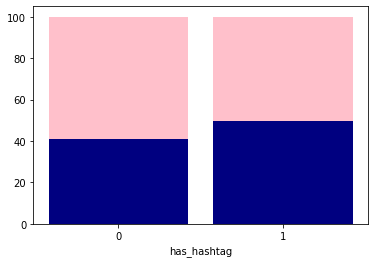

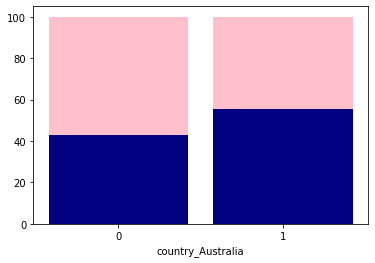

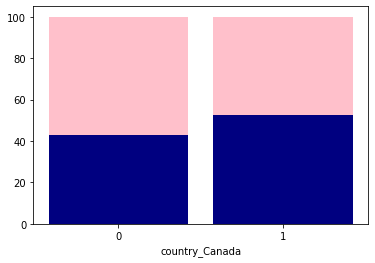

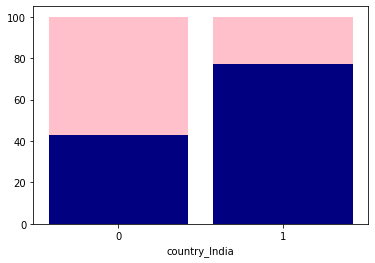

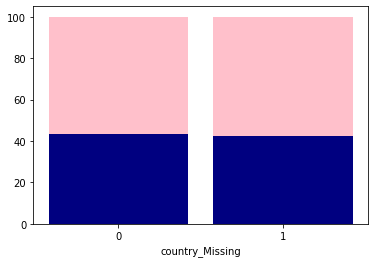

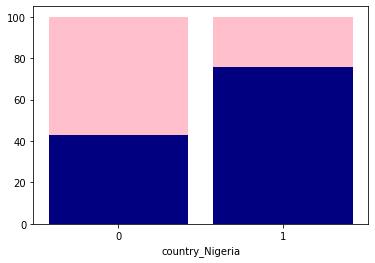

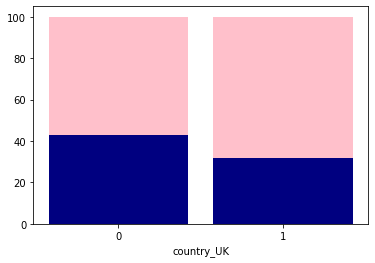

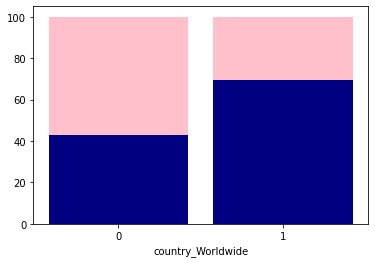

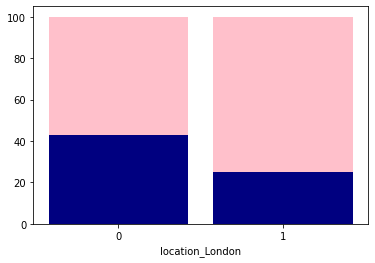

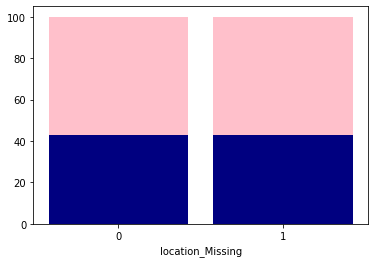

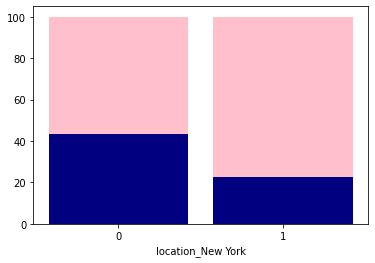

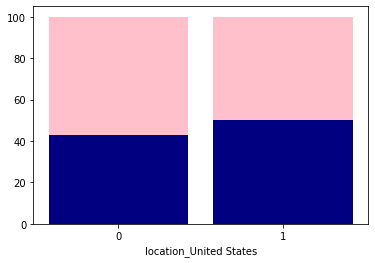

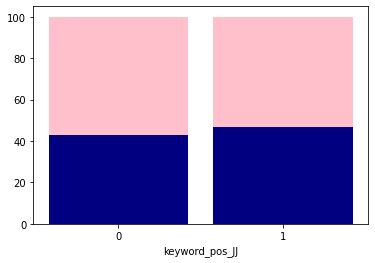

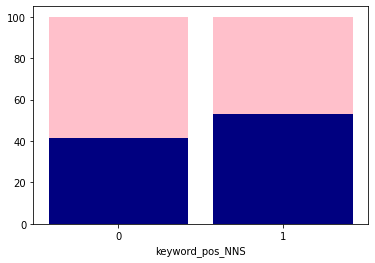

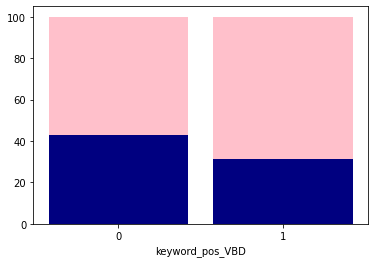

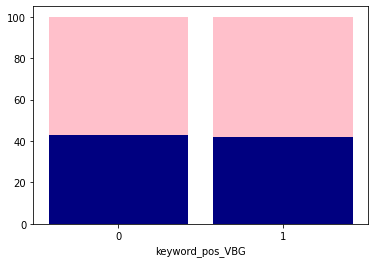

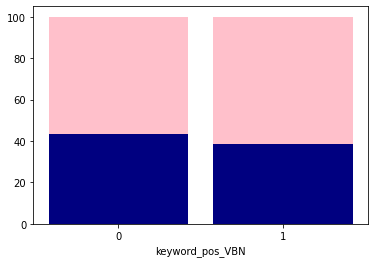

In [659]:
for k in bin_col:
    cross = pd.crosstab(df_train[k], df_train['target'])
    totals = [i+j for i,j in zip(cross[0.0], cross[1.0])]
    target = [i/j * 100 for i,j in zip(cross[1.0],totals)]
    nontarget = [i/j * 100 for i,j in zip(cross[0.0], totals)]
    
    barWidth = 0.85
    names = ('0', '1')
    r =[0,1]
    
    plt.bar(r, target, color='navy', width=barWidth)
    plt.bar(r, nontarget, bottom=target, color='pink', width=barWidth)
    plt.xticks(r, names)
    plt.xlabel(k)
    plt.show()

In [665]:
notdiff =[]
for i in bin_col:
    table=df_train[[i, 'target']].groupby([i], as_index=False).mean().sort_values(by='target', ascending=False)
    print('--------------------------------------')
    print(i)
    print(table)
    print(' ')
    diff = 100* (table.loc[0,'target'] - table.loc[1, 'target']) / table.loc[0,'target']
    print('Różnica: ', diff)
    if abs(diff) <= 10:
        notdiff.append(table.columns[0])

--------------------------------------
has_hashtag
   has_hashtag    target
1            1  0.496314
0            0  0.409932
 
Różnica:  -21.072443637764305
--------------------------------------
country_Australia
   country_Australia    target
1                  1  0.555556
0                  0  0.429083
 
Różnica:  -29.474969474969484
--------------------------------------
country_Canada
   country_Canada    target
1               1  0.523810
0               0  0.428977
 
Różnica:  -22.106743932140763
--------------------------------------
country_India
   country_India    target
1              1  0.774194
0              0  0.427709
 
Różnica:  -81.00959485237591
--------------------------------------
country_Missing
   country_Missing    target
0                0  0.431966
1                1  0.425307
 
Różnica:  1.5416665754070842
--------------------------------------
country_Nigeria
   country_Nigeria    target
1                1  0.756757
0                0  0.427438
 
Różnica:

In [666]:
notdiff

['country_Missing', 'location_Missing', 'keyword_pos_JJ', 'keyword_pos_VBG']

In [667]:
df_train.drop(notdiff, axis=1, inplace=True)
df_test.drop(notdiff, axis=1, inplace=True)

#### Checking for correlation with target

In [672]:
kols =[i for i in df_train.columns if i!='id']

In [673]:
bazaCorr=df_train[kols].corr().dropna(how='all',axis=1).dropna(how='all',axis=0)

In [674]:
bazaCorr

,target,word_num,avg_word_len,has_hashtag,nonalpha_count,accident,amp,attack,bad,bag,...,country_India,country_Nigeria,country_UK,country_Worldwide,location_London,location_New York,location_United States,keyword_pos_NNS,keyword_pos_VBD,keyword_pos_VBN
target,1.000000,0.015886,0.163704,0.073336,0.017508,0.065997,-0.017192,0.064675,-0.028707,-0.071006,...,0.053228,0.055239,-0.029566,0.044101,-0.026386,-0.041163,0.011708,0.072921,-0.028871,-0.030114
word_num,0.015886,1.000000,-0.493173,0.159115,0.550442,0.010996,0.191147,-0.004755,0.055843,0.004328,...,0.012998,-0.005276,0.006038,-0.004481,0.026718,0.019008,0.001790,0.058034,-0.017512,0.034766
avg_word_len,0.163704,-0.493173,1.000000,-0.005312,-0.205537,0.000294,-0.092072,0.021040,-0.053808,-0.005752,...,0.000098,0.050651,0.009226,0.041819,-0.011533,0.064114,0.005189,-0.018907,-0.007495,-0.022962
has_hashtag,0.073336,0.159115,-0.005312,1.000000,0.347590,0.010379,0.031175,-0.003633,0.002110,-0.012196,...,-0.006475,0.018941,0.017748,0.014998,0.015962,-0.032144,0.020449,0.015319,-0.006146,-0.024143
nonalpha_count,0.017508,0.550442,-0.205537,0.347590,1.000000,0.007999,0.171963,-0.028335,-0.007014,0.001669,...,0.008147,-0.004153,-0.008907,0.010763,-0.001015,0.051024,0.024108,0.024929,-0.021957,-0.013330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
location_New York,-0.041163,0.019008,0.064114,-0.032144,0.051024,-0.010580,-0.019157,-0.000927,-0.009947,0.115032,...,-0.007667,-0.008381,-0.013211,-0.008266,-0.007284,1.000000,-0.008266,-0.017095,-0.012136,-0.015453
location_United States,0.011708,0.001790,0.005189,0.020449,0.024108,-0.008705,0.012728,0.000633,-0.008185,-0.008662,...,-0.006308,-0.006896,-0.010870,-0.006801,-0.005994,-0.008266,1.000000,-0.007020,0.047606,-0.005481
keyword_pos_NNS,0.072921,0.058034,-0.018907,0.015319,0.024929,-0.016881,0.023543,-0.015739,-0.021220,0.084133,...,-0.026887,-0.014944,-0.004661,-0.014343,-0.008952,-0.017095,-0.007020,1.000000,-0.042560,-0.119485
keyword_pos_VBD,-0.028871,-0.017512,-0.007495,-0.006146,-0.021957,-0.002730,0.007223,-0.007765,0.003531,0.006712,...,-0.009262,-0.010125,-0.003822,0.009211,0.012951,-0.012136,0.047606,-0.042560,1.000000,-0.041160


In [675]:
np.abs(bazaCorr['target']).sort_values(ascending=False)[0:30]

target             1.000000
pron               0.285699
avg_word_len       0.163704
http               0.133661
kill               0.128911
california         0.126139
hiroshima          0.122279
suicide            0.115367
train              0.109966
pron pron          0.098961
police             0.092895
family             0.086455
bomb               0.084001
storm              0.080515
building           0.079090
disaster           0.078556
like               0.077170
let                0.074712
pron just          0.074393
crash              0.073529
has_hashtag        0.073336
news               0.073239
home               0.073206
keyword_pos_NNS    0.072921
bag                0.071006
nuclear            0.068954
just               0.066722
accident           0.065997
love               0.065969
panic              0.065775
Name: target, dtype: float64

In [683]:
for i in kols:
    for j in kols:
        if i != j and bazaCorr[i][j] >= 0.5 or bazaCorr[i][j] <= -0.5:
            print(i,j,":",bazaCorr[i][j], bazaCorr[i]['target'], bazaCorr['target'][j]) 
            print(" ")

word_num nonalpha_count : 0.5504416329288023 0.015886025176689404 0.017507943588855036
 
nonalpha_count word_num : 0.5504416329288023 0.017507943588855036 0.015886025176689404
 
bag body : 0.5857692148291871 -0.07100629485062544 -0.043422722084818094
 
body bag : 0.5857692148291871 -0.043422722084818094 -0.07100629485062544
 
country_UK location_London : 0.5513941630547897 -0.02956590031214603 -0.026385734187786686
 
location_London country_UK : 0.5513941630547897 -0.026385734187786686 -0.02956590031214603
 


In [680]:
skorelowane = []
for i in kols:
    for j in kols:
        if i != j and bazaCorr[i][j] >= 0.5 or bazaCorr[i][j] <= -0.5:
            if i not in skorelowane and j not in skorelowane:
                if abs(bazaCorr[i]['target']) < abs(bazaCorr['target'][j]):
                    skorelowane.append(i)
                else:
                    skorelowane.append(j)

In [681]:
skorelowane

['word_num', 'body', 'location_London']

In [684]:
df_train.drop(skorelowane, axis=1, inplace=True)
df_test.drop(skorelowane, axis=1, inplace=True)

## 8. Selecting features for modelling

In [691]:
features = [i for i in df_train.columns if i != 'target' and i != 'id']

In [692]:
len(features)

99

In [693]:
X_train = df_train[features]
y_train = df_train['target']
X_test = df_test[features]
y_test = df_test['target']

In [698]:
model = ExtraTreesClassifier(n_estimators=12)
model.fit(X_train, y_train)
print(model.feature_importances_)

[0.24444151 0.01478294 0.10437888 0.00562683 0.00887364 0.00650609
 0.00300275 0.00641602 0.00448012 0.00648236 0.00996083 0.00596159
 0.01161121 0.0049234  0.00380611 0.0043054  0.00315019 0.00509236
 0.00530769 0.00565373 0.00457744 0.00579442 0.00329373 0.00390501
 0.00846807 0.00417466 0.00666804 0.0055035  0.00272875 0.00804472
 0.0026117  0.00195448 0.00507012 0.00492187 0.00350449 0.01410715
 0.00518965 0.05295076 0.01174409 0.0073661  0.01198767 0.0045076
 0.00447441 0.00908532 0.00206593 0.00509303 0.00517107 0.00430804
 0.00572027 0.00421044 0.00294083 0.01067825 0.0062077  0.00439294
 0.00288522 0.00355078 0.00704003 0.00315321 0.00685112 0.07961744
 0.00245941 0.00254974 0.00247546 0.00672912 0.00363559 0.00462434
 0.0057753  0.00314296 0.00306104 0.01001303 0.00894882 0.00322057
 0.00342506 0.00506619 0.00465203 0.01134771 0.00365801 0.00671694
 0.00540021 0.00497861 0.00696164 0.00270251 0.00357592 0.00377345
 0.00437466 0.00410601 0.00477867 0.00442954 0.00267241 0.00316

In [699]:
features_tree_ = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns=['value']).sort_values('value', ascending=False)[0:30]

In [700]:
features_tree_

,value
avg_word_len,0.244442
nonalpha_count,0.104379
pron,0.079617
http,0.052951
has_hashtag,0.014783
hiroshima,0.014107
kill,0.011988
keyword_pos_NNS,0.011979
keyword_pos_VBN,0.011916
https,0.011744


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

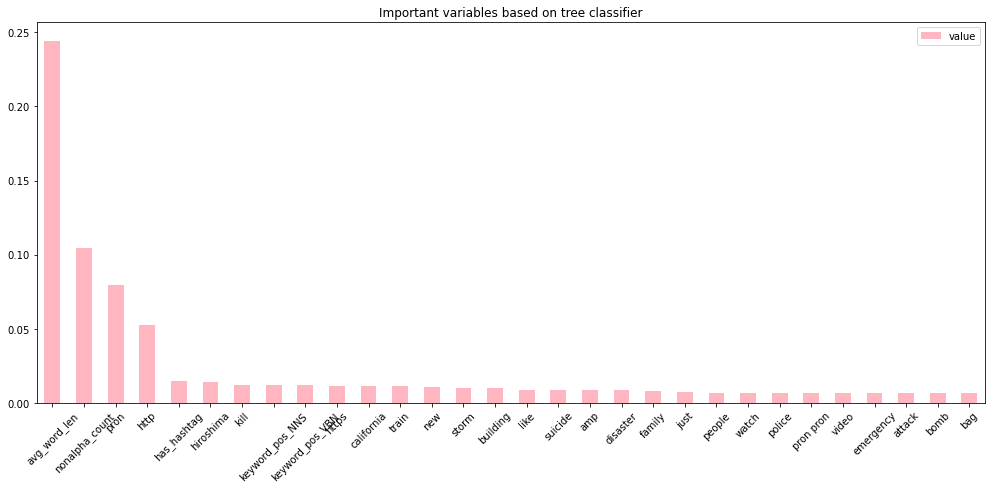

In [701]:
features_tree_.plot(kind='bar', color='lightpink', figsize=(17,7))
plt.title('Important variables based on tree classifier')
plt.xticks(rotation=45)

In [704]:
features_tree = features_tree_[features_tree_['value'] >= 0.001]

In [705]:
len(features_tree)

30

## 9. Models fitting

In [706]:
def evaluateModel(alg, X_train, Y_train, X_test, Y_test, treshold):

    #Fit the algorithm on the data
    alg.fit(X_train, Y_train)
        
    #Predict test set:
    X_test_predictions = alg.predict(X_test)
    X_test_predprob0 = alg.predict_proba(X_test)
    X_test_predprob = alg.predict_proba(X_test)[:,1]
    
    for i in range(len(X_test_predprob)):
        if X_test_predprob[i] >= treshold:
            X_test_predprob[i] = 1
        else:
            X_test_predprob[i] = 0
    
    print("AUC Score: " + str(roc_auc_score(Y_test, X_test_predprob0[:,1])))
    print("Accuracy Test: " + str(accuracy_score(Y_test, X_test_predictions)))
    print("Precision: " + str(precision_score(Y_test, X_test_predprob)))
    print("Recall: " + str(recall_score(Y_test, X_test_predprob)))

    confMatrix=confusion_matrix(Y_test, X_test_predprob)
    
    confMatrix=pd.DataFrame(confMatrix)
    
    confMatrix.columns=[['Predicted 0','Predicted 1']]
    confMatrix.index=[['True 0','True 1']]
    print('')
    print('Confusion Matrix:')
    print('')

    print(confMatrix)
    
    print('Accuracy Matrix:')
    Accuracy_Matrix=100*confMatrix.div(confMatrix.sum(axis=1),axis=0)
    print(Accuracy_Matrix)
    print('')
    return  X_test_predprob0

### 9.1. Logistic Regression

In [726]:
k = 1
preds_lr = []
log_reg = LogisticRegression(max_iter=200)
print('TRAIN set')
evaluateModel(log_reg, X_train[features_tree.index], y_train, X_train[features_tree.index], y_train, 0.5)
print('')
print('TEST set')
X_test_pred = evaluateModel(log_reg, X_train[features_tree.index], y_train, X_test[features_tree.index], y_test, 0.5)
preds_lr.append(X_test_pred[:,1])
print(' ')

TRAIN set
AUC Score: 0.7555253322527664
Accuracy Test: 0.6911240382811034
Precision: 0.6784922394678492
Recall: 0.5344978165938865

Confusion Matrix:

       Predicted 0 Predicted 1
True 0        2459         580
True 1        1066        1224
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   80.914775   19.085225
True 1   46.550218   53.449782


TEST set
AUC Score: 0.7417153858851564
Accuracy Test: 0.6882661996497373
Precision: 0.6691823899371069
Recall: 0.5423037716615698

Confusion Matrix:

       Predicted 0 Predicted 1
True 0        1040         263
True 1         449         532
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   79.815810   20.184190
True 1   45.769623   54.230377

 


#### Optimizing parameters - grid search

In [727]:
model = LogisticRegression(max_iter=1000)
solvers = [ 'lbfgs', 'liblinear']
penalty = ['l1', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [728]:
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train[features_tree.index], y_train)

In [729]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.690063 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.682556 (0.020290) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.682493 (0.020344) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.682556 (0.020342) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.683056 (0.020288) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.683307 (0.020667) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.683244 (0.020762) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'lbfgs'}
0.683932 (0.020316) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.684183 (0.020933) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.684683 (0.020859) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 

In [730]:
preds_lr_opt = []
log_reg = LogisticRegression(C=1, penalty='l1', solver='liblinear', max_iter=1000)
print('TRAIN set')
evaluateModel(log_reg, X_train[features_tree.index], y_train, X_train[features_tree.index], y_train, 0.5)
print('TEST set')
X_test_pred = evaluateModel(log_reg, X_train[features_tree.index], y_train, X_test[features_tree.index], y_test, 0.5)
preds_lr_opt.append(X_test_pred[:,1])

TRAIN set
AUC Score: 0.7558745048000448
Accuracy Test: 0.6898104710076938
Precision: 0.6823125357756153
Recall: 0.5205240174672489

Confusion Matrix:

       Predicted 0 Predicted 1
True 0        2484         555
True 1        1098        1192
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   81.737414   18.262586
True 1   47.947598   52.052402

TEST set
AUC Score: 0.7425055329855121
Accuracy Test: 0.6891418563922942
Precision: 0.6748387096774193
Recall: 0.5331294597349643

Confusion Matrix:

       Predicted 0 Predicted 1
True 0        1051         252
True 1         458         523
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   80.660015   19.339985
True 1   46.687054   53.312946



#### ROC Curver before and after tuning

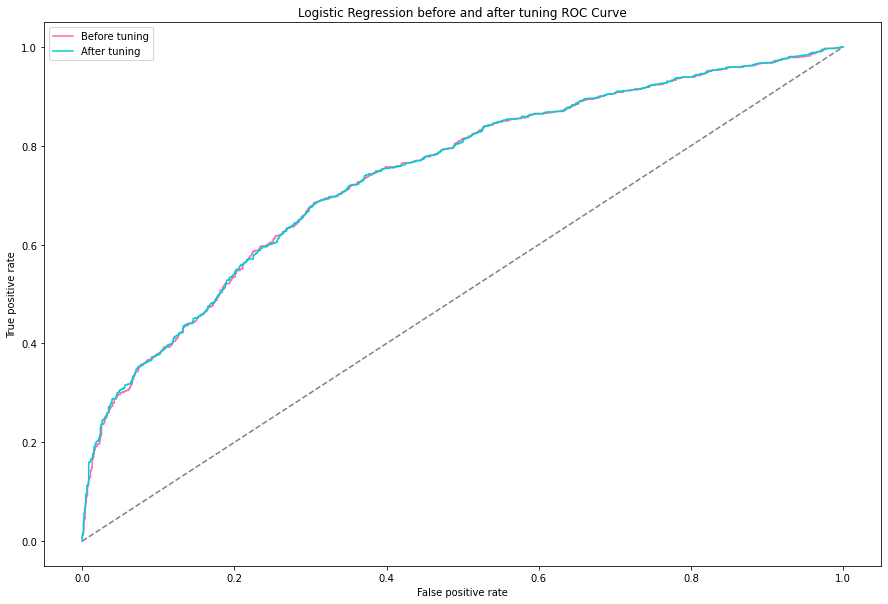

In [731]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, preds_lr[0])
fpr2, tpr2, thresholds2 = roc_curve(y_test, preds_lr_opt[0])
plt.figure(figsize=(15,10))
plt.title("Logistic Regression before and after tuning ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.plot(fpr1, tpr1, label='Before tuning', color='hotpink')
plt.plot(fpr2, tpr2, label='After tuning', color='darkturquoise')
plt.legend(loc="upper left")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

### 9.2. Random Forest

In [732]:
preds_rf = []
rf = RandomForestClassifier()
print('TRAIN set')
evaluateModel(rf, X_train[features_tree.index], y_train, X_train[features_tree.index], y_train, 0.5)
print('TEST set')
X_test_pred = evaluateModel(rf, X_train[features_tree.index], y_train, X_test[features_tree.index], y_test, 0.5)
preds_rf.append(X_test_pred[:,1])

TRAIN set
AUC Score: 0.9981279753308876
Accuracy Test: 0.9793582285607055
Precision: 0.9789103690685413
Recall: 0.9729257641921397

Confusion Matrix:

       Predicted 0 Predicted 1
True 0        2991          48
True 1          62        2228
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   98.420533    1.579467
True 1    2.707424   97.292576

TEST set
AUC Score: 0.7216460406980519
Accuracy Test: 0.6795096322241682
Precision: 0.6390465380249716
Recall: 0.5739041794087666

Confusion Matrix:

       Predicted 0 Predicted 1
True 0         985         318
True 1         418         563
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   75.594781   24.405219
True 1   42.609582   57.390418



#### Optimizing parameters - grid search

In [734]:
param_grid1 = {
    'max_depth': np.arange(3,20,1),
    'max_features': ["auto", "sqrt", "log2"]


}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid1, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train[features_tree.index],y_train)
grid_search.best_params_, grid_search.best_score_

Fitting 3 folds for each of 51 candidates, totalling 153 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 153 out of 153 | elapsed:   15.9s finished


({'max_depth': 12, 'max_features': 'auto'}, 0.7147710104589677)

In [736]:
param_grid2 = {
    'min_samples_leaf': [3, 4, 5, 10],
    'min_samples_split': [3, 8, 10, 12]
}
rf = RandomForestClassifier(max_depth=12, max_features='auto')
grid_search2 = GridSearchCV(estimator = rf, 
 param_grid = param_grid2)
grid_search2.fit(X_train[features_tree.index],y_train)
grid_search2.best_params_, grid_search2.best_score_

({'min_samples_leaf': 3, 'min_samples_split': 8}, 0.7151464383549577)

In [738]:
param_grid3= {
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestClassifier(max_depth=12, max_features='auto', min_samples_leaf=3, min_samples_split=8)
grid_search3 = GridSearchCV(estimator = rf, 
 param_grid = param_grid3, cv=5)
grid_search3.fit(X_train[features_tree.index],y_train)
grid_search3.best_params_, grid_search3.best_score_

({'n_estimators': 1000}, 0.7158956742330154)

In [740]:
preds_rf_opt = []
rf = RandomForestClassifier(max_depth=12, max_features='auto', min_samples_leaf=3, min_samples_split=8, n_estimators=1000)
print('TEST')
X_test_pred = evaluateModel(rf, X_train[features_tree.index], y_train, X_test[features_tree.index], y_test, 0.5)
preds_rf_opt.append(X_test_pred[:,1])

TEST
AUC Score: 0.7585533423613507
Accuracy Test: 0.6992119089316988
Precision: 0.6909090909090909
Recall: 0.5423037716615698

Confusion Matrix:

       Predicted 0 Predicted 1
True 0        1065         238
True 1         449         532
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   81.734459   18.265541
True 1   45.769623   54.230377



#### ROC Curver before and after tuning

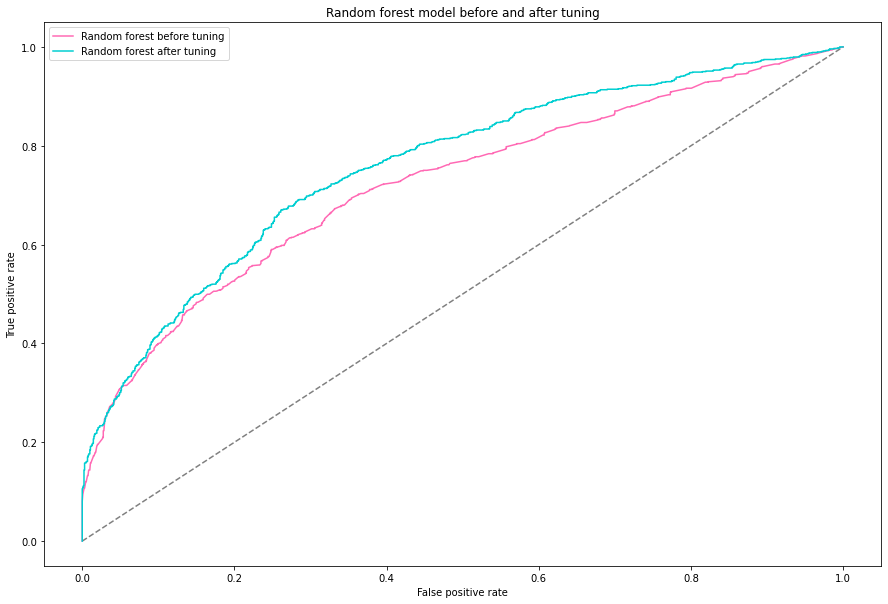

In [741]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, preds_rf[0])
fpr2, tpr2, thresholds2 = roc_curve(y_test, preds_rf_opt[0])
plt.figure(figsize=(15,10))
plt.title("Random forest model before and after tuning")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.plot(fpr1, tpr1, label='Random forest before tuning', color='hotpink')
plt.plot(fpr2, tpr2, label='Random forest after tuning', color='darkturquoise')
plt.legend(loc="upper left")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

### 9.3. XGBoost

In [742]:
preds_xgb = []
xg_boost_1 = XGBClassifier(objective= 'binary:logistic')
print('TRAIN set')
evaluateModel(xg_boost_1, X_train[features_tree.index], y_train, X_train[features_tree.index], y_train, 0.5)
X_test_pred = evaluateModel(xg_boost_1, X_train[features_tree.index], y_train, X_test[features_tree.index], y_test, 0.3)
preds_xgb.append(X_test_pred[:,1])

TRAIN set
AUC Score: 0.9173386442046697
Accuracy Test: 0.8245449427659973
Precision: 0.8413098236775819
Recall: 0.7292576419213974

Confusion Matrix:

       Predicted 0 Predicted 1
True 0        2724         315
True 1         620        1670
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   89.634748   10.365252
True 1   27.074236   72.925764

AUC Score: 0.7486694626921485
Accuracy Test: 0.7057793345008757
Precision: 0.5584415584415584
Recall: 0.7889908256880734

Confusion Matrix:

       Predicted 0 Predicted 1
True 0         691         612
True 1         207         774
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   53.031466   46.968534
True 1   21.100917   78.899083



#### Optimizing parameters - grid search

In [744]:
param_test1 = {
 'max_depth': np.arange(3,20,1),
 'min_child_weight': np.arange(1,6,1),
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(objective= 'binary:logistic'), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(X_train[features_tree.index],y_train)
gsearch1.best_params_, gsearch1.best_score_

C:\Users\klaud\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'max_depth': 3, 'min_child_weight': 4}, 0.7714517159938238)

In [747]:
param_test2 = {
 'gamma': [i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( max_depth=3,
 min_child_weight=4,
 objective= 'binary:logistic'), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train[features_tree.index],y_train)
gsearch2.best_params_, gsearch1.best_score_

C:\Users\klaud\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'gamma': 0.0}, 0.7714517159938238)

In [748]:
param_test3= {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( max_depth=3,
 min_child_weight=4, gamma=0,
 objective= 'binary:logistic'), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train[features_tree.index],y_train)
gsearch3.best_params_, gsearch3.best_score_

C:\Users\klaud\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'colsample_bytree': 0.8, 'subsample': 0.9}, 0.7682729514168001)

In [749]:
param_test4= {
'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( max_depth=3,
 min_child_weight=4, gamma=0, colsample_bytree = 0.8, subsample= 0.9,
 objective= 'binary:logistic'), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train[features_tree.index],y_train)
gsearch4.best_params_, gsearch4.best_score_

C:\Users\klaud\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


({'reg_alpha': 1}, 0.7690401288669649)

In [750]:
k = 1
preds_xgb_opt = []
xg_boost_1 = XGBClassifier(objective= 'binary:logistic', max_depth=3,
min_child_weight=4, gamma=0, colsample_bytree = 0.8, subsample= 0.9, reg_alpha=1)
print('TEST')
X_test_pred = evaluateModel(xg_boost_1, X_train[features_tree.index], y_train, X_test[features_tree.index], y_test, 0.5)
preds_xgb_opt.append(X_test_pred[:,1])

TEST
AUC Score: 0.7520725714907103
Accuracy Test: 0.6978984238178634
Precision: 0.685823754789272
Recall: 0.5474006116207951

Confusion Matrix:

       Predicted 0 Predicted 1
True 0        1057         246
True 1         444         537
Accuracy Matrix:
       Predicted 0 Predicted 1
True 0   81.120491   18.879509
True 1   45.259939   54.740061



#### ROC Curver before and after tuning

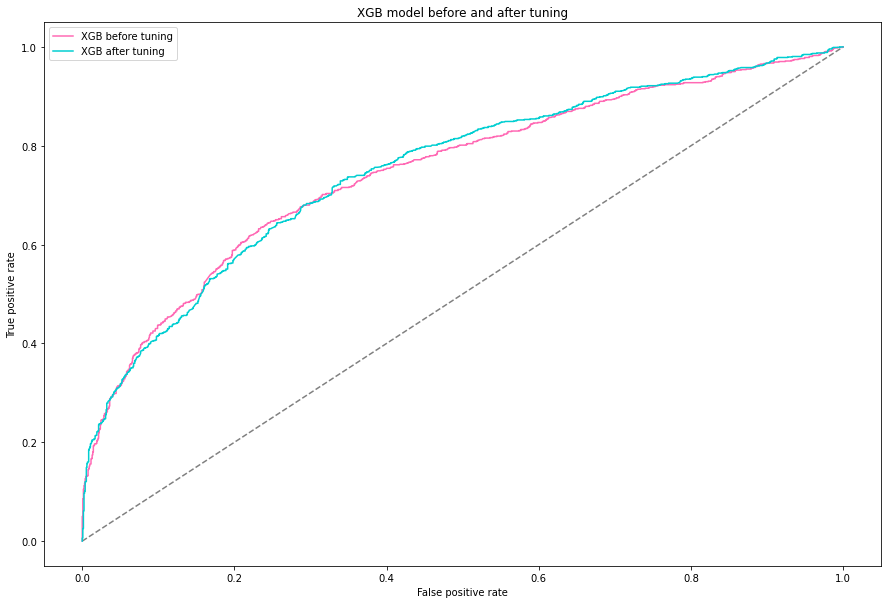

In [751]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, preds_xgb[0])
fpr2, tpr2, thresholds2 = roc_curve(y_test, preds_xgb_opt[0])
plt.figure(figsize=(15,10))
plt.title("XGB model before and after tuning")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.plot(fpr1, tpr1, label='XGB before tuning', color='hotpink')
plt.plot(fpr2, tpr2, label='XGB after tuning', color='darkturquoise')
plt.legend(loc="upper left")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

### 9.4. Models' comparison

##### ROC Curves

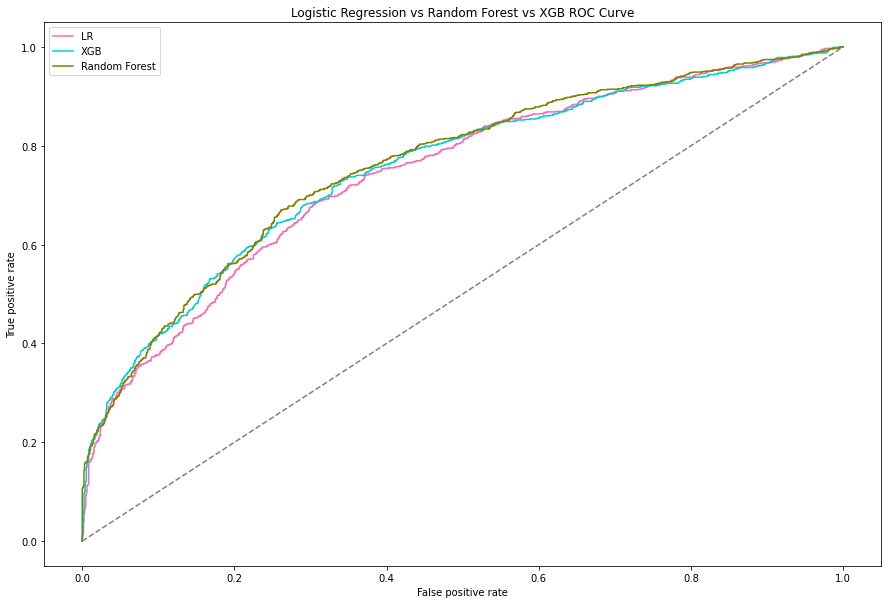

In [752]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, preds_lr_opt[0])
fpr2, tpr2, thresholds2 = roc_curve(y_test, preds_xgb_opt[0])
fpr3, tpr3, thresholds3 = roc_curve(y_test, preds_rf_opt[0])
plt.figure(figsize=(15,10))
plt.title("Logistic Regression vs Random Forest vs XGB ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.plot(fpr1, tpr1, label='LR', color='hotpink')
plt.plot(fpr2, tpr2, label='XGB', color='darkturquoise')
plt.plot(fpr3, tpr3, label='Random Forest', color='olive')
plt.legend(loc="upper left")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [753]:
print('Logistic Regression AUC: ', roc_auc_score(y_test, preds_lr_opt[0]))
print('Random Forest AUC: ', roc_auc_score(y_test, preds_rf_opt[0]))
print('XGBoost AUC: ', roc_auc_score(y_test, preds_xgb_opt[0]))

Logistic Regression AUC:  0.7425055329855121
Random Forest AUC:  0.7585533423613507
XGBoost AUC:  0.7520725714907103
